In [1]:
import numpy as np
import cv2
import pandas as pd
import seaborn as sns
from tqdm import tqdm
from matplotlib import pyplot as plt

In [2]:
def loadcsv(loadpath, stain_type):
    if loadpath=="Feature_image":
        loadpath_RETT = f"{loadpath}/features_RETT_{stain_type}.csv"
        loadpath_CTRL = f"{loadpath}/features_CTRL_{stain_type}.csv"
    elif loadpath=="Feature_GradCAM":
        loadpath_RETT = f"{loadpath}/features_RETT_{stain_type}_Resnet10_noavg_GradCAM.csv"
        loadpath_CTRL = f"{loadpath}/features_CTRL_{stain_type}_Resnet10_noavg_GradCAM.csv"
    elif loadpath=="Feature_ScoreCAM":
        loadpath_RETT = f"{loadpath}/features_RETT_{stain_type}_Resnet10_noavg_ScoreCAM.csv"
        loadpath_CTRL = f"{loadpath}/features_CTRL_{stain_type}_Resnet10_noavg_ScoreCAM.csv"
    elif loadpath=="Feature_image_correct":
        loadpath_RETT = f"{loadpath}/features_RETT_{stain_type}_correct.csv"
        loadpath_CTRL = f"{loadpath}/features_CTRL_{stain_type}_correct.csv"
    else:
        print(f"Load Failed, can not find {loadpath}")
    print(f"🌸 {loadpath_RETT}")
    print(f"🌼 {loadpath_CTRL}")
    # 定义你想要读取的列的索引，注意 Python 索引从 0 开始
    columns_to_use = [10] + list(range(12, 19)) + list(range(20, 22)) + list(range(36, 93))
    # 读取 CSV 文件时仅加载指定的列
    df_RETT = pd.read_csv(loadpath_RETT, usecols=columns_to_use)
    df_CTRL = pd.read_csv(loadpath_CTRL, usecols=columns_to_use)

    # 添加状态标签
    df_CTRL['State'] = 'CTRL'
    df_RETT['State'] = 'RETT'

    # 合并数据
    df_combined = pd.concat([df_CTRL, df_RETT])
    
    return df_combined, df_RETT, df_CTRL

In [3]:
loadpath = "Feature_image"
stain_type = "H3K27ac"
savename = f"Feature_{stain_type}"

df_combined, df_RETT, df_CTRL = loadcsv(loadpath, stain_type)

features = df_CTRL.columns.tolist()
print(len(features))
df_combined

🌸 Feature_image/features_RETT_H3K27ac.csv
🌼 Feature_image/features_CTRL_H3K27ac.csv
68


Size.Area  Size.MajorAxisLength  Size.MinorAxisLength  Size.Perimeter   
0       38948.0            277.440968            187.541394      799.737157  \
1       42887.0            246.549569            222.685646      788.506709   
2       28540.0            207.622145            175.893498      639.470129   
3       21662.0            188.845307            147.394722      566.256926   
4       40446.0            290.127228            178.573957      790.080303   
...         ...                   ...                   ...             ...   
3590    37307.0            278.129667            173.833075      766.884343   
3591    59634.0            372.976981            209.742620     1091.986940   
3592    23753.0            215.864035            144.384424      623.487373   
3593    20367.0            193.239746            137.550162      572.274170   
3594    48051.0            335.640401            183.211122      881.050865   

      Shape.Circularity  Shape.Eccentricity  Shape.EquivalentDiameter   
0              0.765245            0.736930                222.688423  \
1              0.866812            0.429202                233.678036   
2              0.877048            0.531305                190.625960   
3              0.848949            0.625149                166.075028   
4              0.814222            0.788135                226.930489   
...                 ...                 ...                       ...   
3590           0.797151            0.780619                217.946663   
3591           0.628447            0.826901                275.551024   
3592           0.767844            0.743382                173.905891   
3593           0.781499            0.702371                161.034375   
3594           0.777876            0.837879                247.346788   

      Shape.Extent  Shape.MinorMajorAxisRatio  Shape.Solidity  ...   
0         0.668039                   0.675969        0.964298  ...  \
1         0.729991                   0.903208        0.990599  ...   
2         0.773987                   0.847181        0.990869  ...   
3         0.741265                   0.780505        0.987329  ...   
4         0.735516                   0.615502        0.989916  ...   
...            ...                        ...             ...  ...   
3590      0.767729                   0.625007        0.987506  ...   
3591      0.687646                   0.562347        0.942875  ...   
3592      0.726836                   0.668867        0.979061  ...   
3593      0.767986                   0.711811        0.959847  ...   
3594      0.724096                   0.545855        0.983825  ...   

      Nucleus.Haralick.IMC1.Mean  Nucleus.Haralick.IMC1.Range   
0                      -0.720952                     0.060465  \
1                      -0.690970                     0.057083   
2                      -0.622926                     0.072067   
3                      -0.647412                     0.070389   
4                      -0.704932                     0.066289   
...                          ...                          ...   
3590                   -0.620520                     0.078634   
3591                   -0.689073                     0.066255   
3592                   -0.563042                     0.076957   
3593                   -0.564333                     0.084252   
3594                   -0.667259                     0.069459   

      Nucleus.Haralick.IMC2.Mean  Nucleus.Haralick.IMC2.Range   
0                       0.949927                     0.010111  \
1                       0.966029                     0.007743   
2                       0.950472                     0.013911   
3                       0.953140                     0.012469   
4                       0.979994                     0.006023   
...                          ...                          ...   
3590                    0.958306                     0.013540   
3591                    0.967769      

# t-检验

                                      Feature        p_value
20           Nucleus.Intensity.MeanMedianDiff  5.048642e-127
24                 Nucleus.Intensity.Skewness  6.170130e-126
35                Nucleus.Gradient.Canny.Mean   6.817652e-93
34                 Nucleus.Gradient.Canny.Sum   9.730107e-92
28                  Nucleus.Gradient.Mag.Mean   3.176850e-89
44                  Nucleus.Haralick.IDM.Mean   5.063888e-87
17                      Nucleus.Intensity.Max   1.125970e-86
26               Nucleus.Intensity.HistEnergy   1.105317e-78
27              Nucleus.Intensity.HistEntropy   2.162931e-77
54   Nucleus.Haralick.DifferenceVariance.Mean   1.046332e-76
56    Nucleus.Haralick.DifferenceEntropy.Mean   1.004641e-75
45                 Nucleus.Haralick.IDM.Range   1.039203e-71
38             Nucleus.Haralick.Contrast.Mean   3.277933e-69
29                   Nucleus.Gradient.Mag.Std   1.021645e-68
57   Nucleus.Haralick.DifferenceEntropy.Range   7.483389e-66
39            Nucleus.Ha

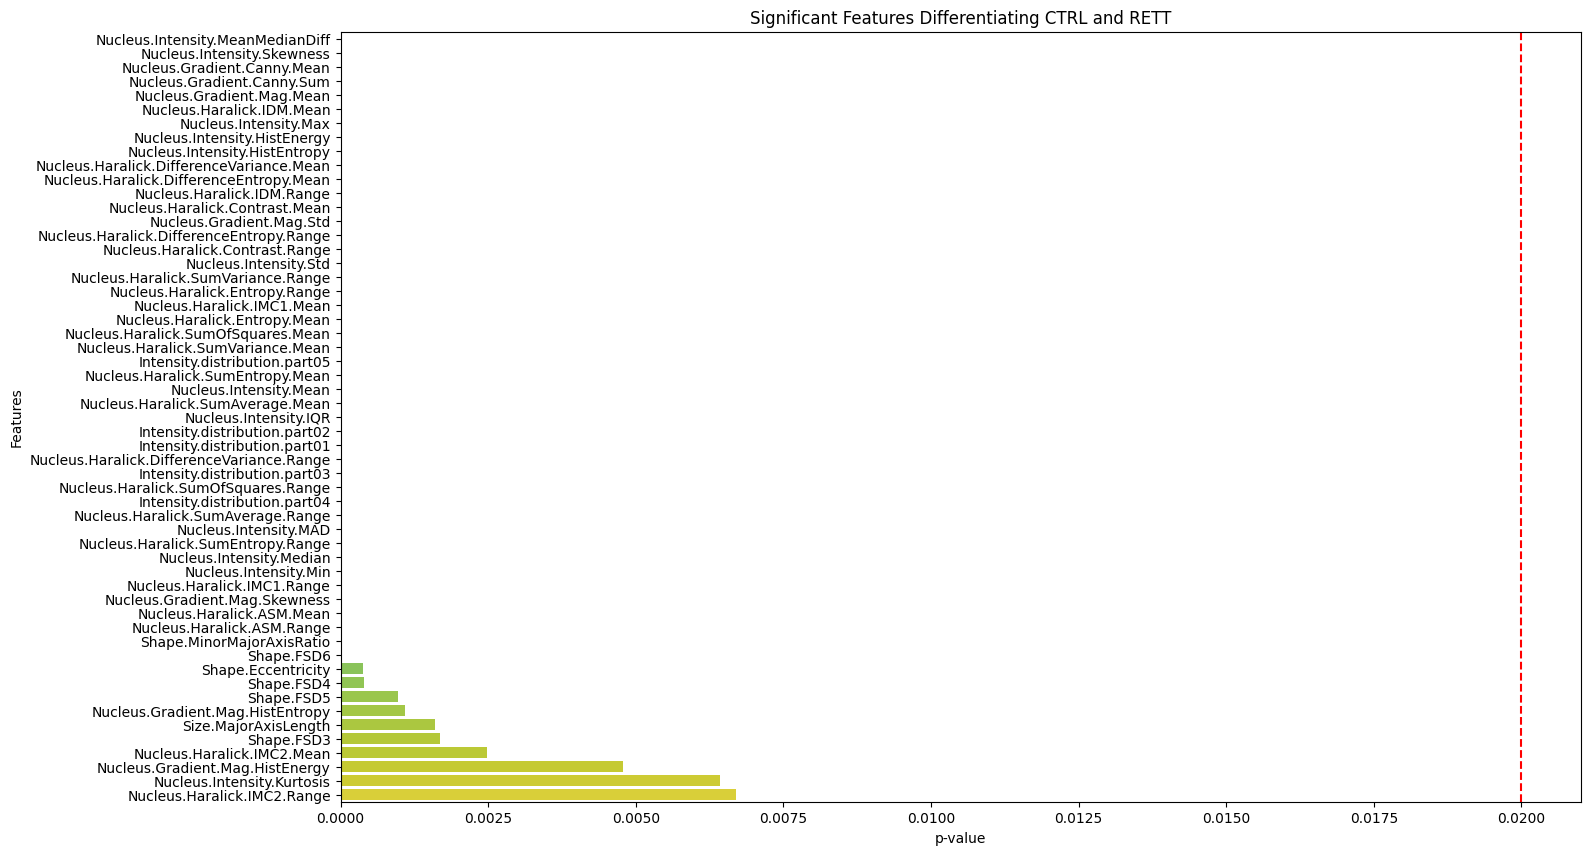

In [4]:
from scipy.stats import ttest_ind
# 初始化存储 p 值的列表
p_values = []

# 进行 t-检验
for column in df_CTRL.columns[:-1]:  # 忽略 'State' 列
    t_stat, p_val = ttest_ind(
        df_CTRL[column], 
        df_RETT[column],
        equal_var=False  # 可以假设不等方差
    )
    p_values.append((column, p_val))

# 将 p 值转化为 DataFrame
p_values_df = pd.DataFrame(p_values, columns=['Feature', 'p_value'])

# 筛选显著特征（例如 p < 0.05）
significant_features = p_values_df[p_values_df['p_value'] < 0.02]

# 按 p 值排序
significant_features = significant_features.sort_values(by='p_value')

# 打印显著特征
print(significant_features)

# 可视化显著特征的 p 值
plt.figure(figsize=(16, 10))
sns.barplot(x='p_value', y='Feature', data=significant_features, palette='viridis')
plt.title('Significant Features Differentiating CTRL and RETT')
plt.xlabel('p-value')
plt.ylabel('Features')
plt.axvline(x=0.02, color='r', linestyle='--')
plt.savefig(f'{loadpath}/{savename}_ttest.png', dpi=300)
plt.show()

# PCA 散点图

                                        PC1       PC2
Size.Area                      9.997401e-01 -0.019901
Size.MajorAxisLength           3.354970e-03  0.000849
Size.MinorAxisLength           2.371400e-03 -0.000590
Size.Perimeter                 9.920092e-03  0.000756
Shape.Circularity             -2.457835e-07 -0.000001
...                                     ...       ...
Intensity.distribution.part05  1.695073e-04  0.013703
Intensity.distribution.part04  8.706611e-05  0.013441
Intensity.distribution.part03  7.635281e-05  0.012609
Intensity.distribution.part02  5.435369e-05  0.011935
Intensity.distribution.part01  4.123729e-05  0.011602

[67 rows x 2 columns]


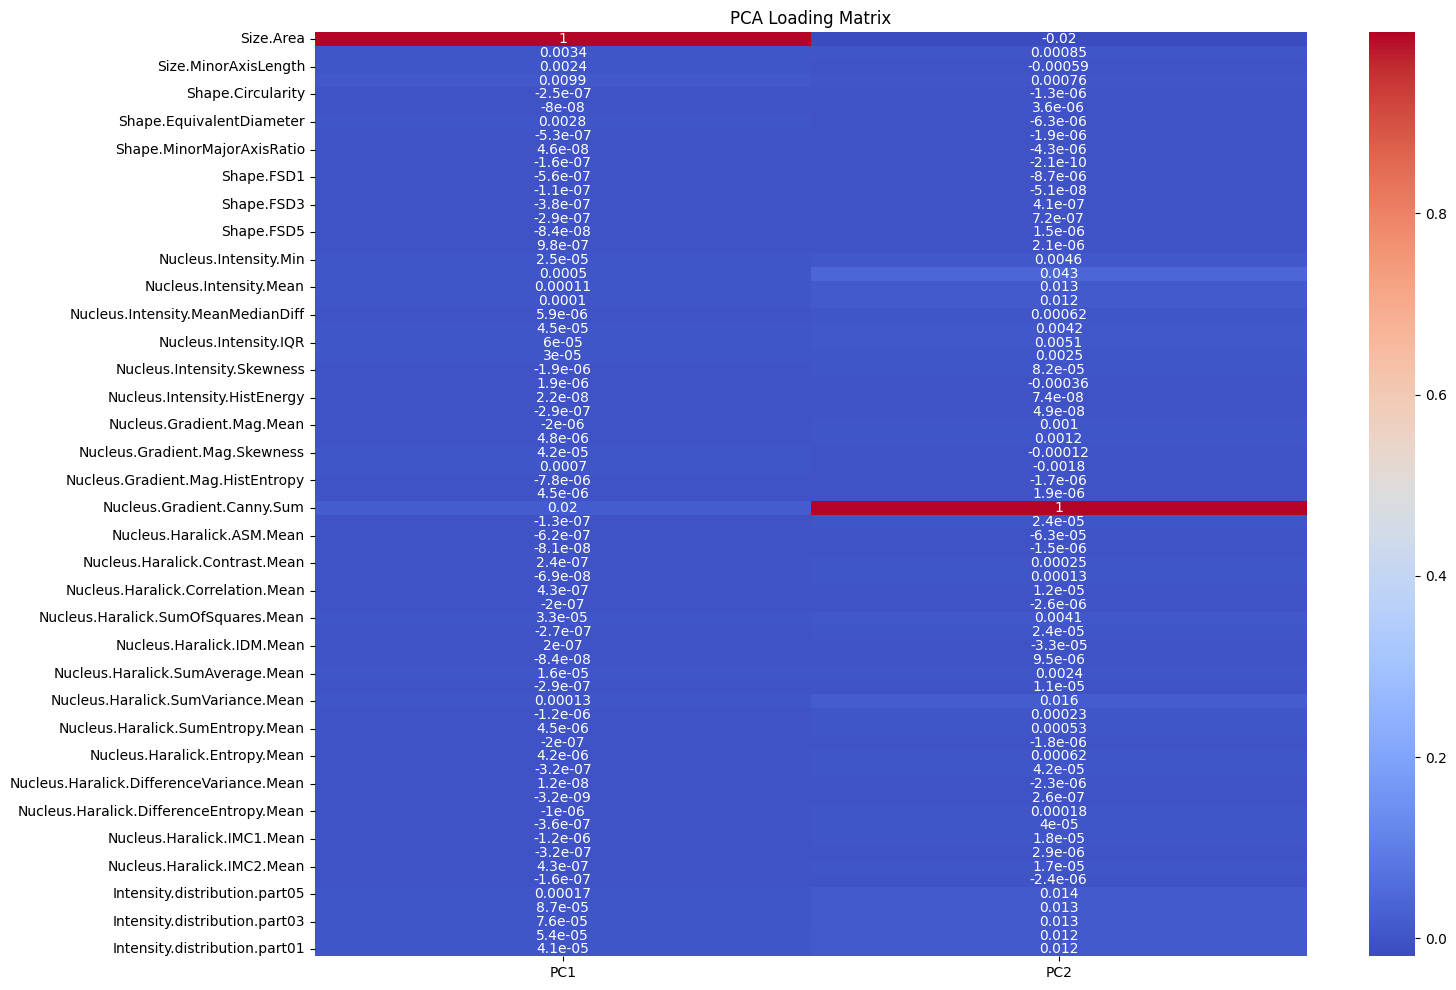

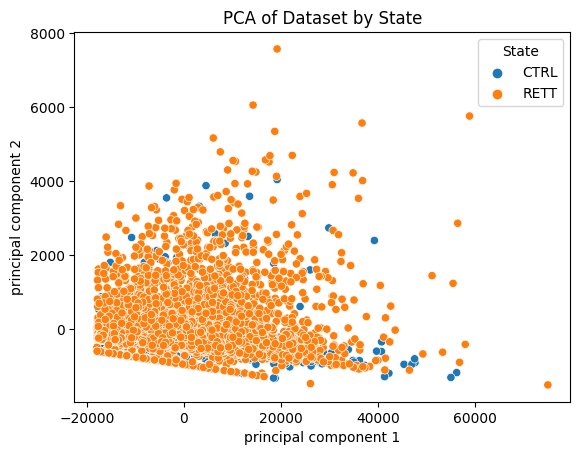

In [5]:
from sklearn.decomposition import PCA
# 提取特征数据
features = df_combined.drop('State', axis=1)

# 应用 PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features)
principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

# 获取加载矩阵
loading_matrix = pca.components_.T
loading_df = pd.DataFrame(loading_matrix, columns=['PC1', 'PC2'], index=features.columns)

# 查看加载矩阵
print(loading_df)

# 可视化加载矩阵
plt.figure(figsize=(16, 12))
sns.heatmap(loading_df, annot=True, cmap='coolwarm')
plt.title('PCA Loading Matrix')
plt.savefig(f'{loadpath}/{savename}_PCA_Matrix.png', dpi=300)
plt.show()

# 重置索引以确保对齐
state_df = df_combined[['State']].reset_index(drop=True)
finalDf = pd.concat([principalDf, state_df], axis=1)

# 使用 Seaborn 绘制 PCA 结果图
sns.scatterplot(data=finalDf, x='principal component 1', y='principal component 2', hue='State')
plt.title('PCA of Dataset by State')
plt.savefig(f'{loadpath}/{savename}_PCA.png', dpi=300)
plt.show()

# t-SNE

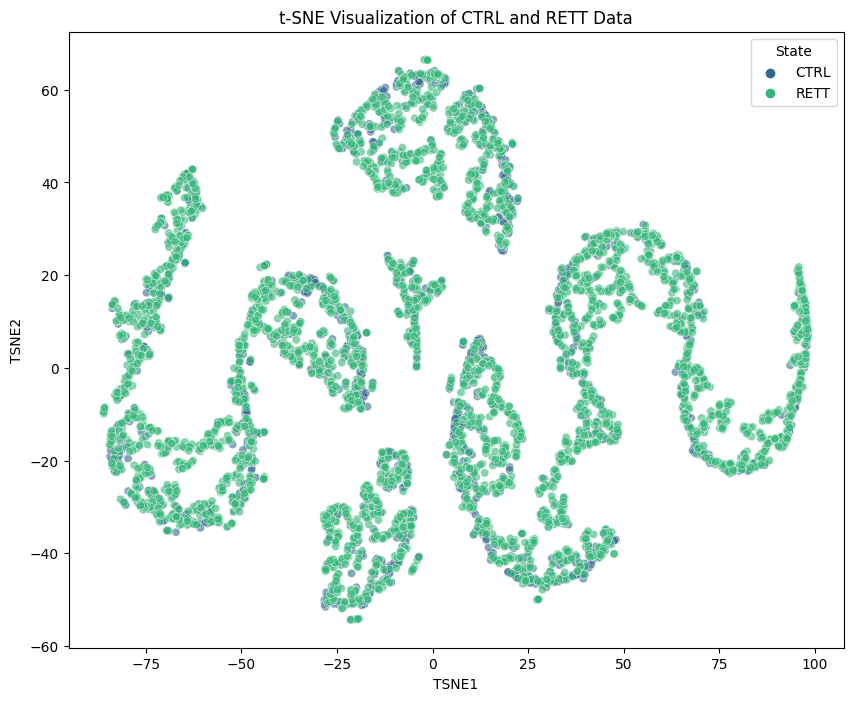

In [6]:
from sklearn.manifold import TSNE

# 应用 t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df_combined.drop('State', axis=1))

# 重置索引，确保索引的一致性
tsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2']).reset_index(drop=True)
state_df = df_combined['State'].reset_index(drop=True)

# 合并 t-SNE 结果和状态标签
final_df = pd.concat([tsne_df, state_df], axis=1)

# 绘制结果
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='State', data=final_df, palette='viridis', alpha=0.6)
plt.title('t-SNE Visualization of CTRL and RETT Data')

plt.savefig(f'{loadpath}/{savename}_tSNE.png', dpi=300)
plt.show()

# BOX 箱型图

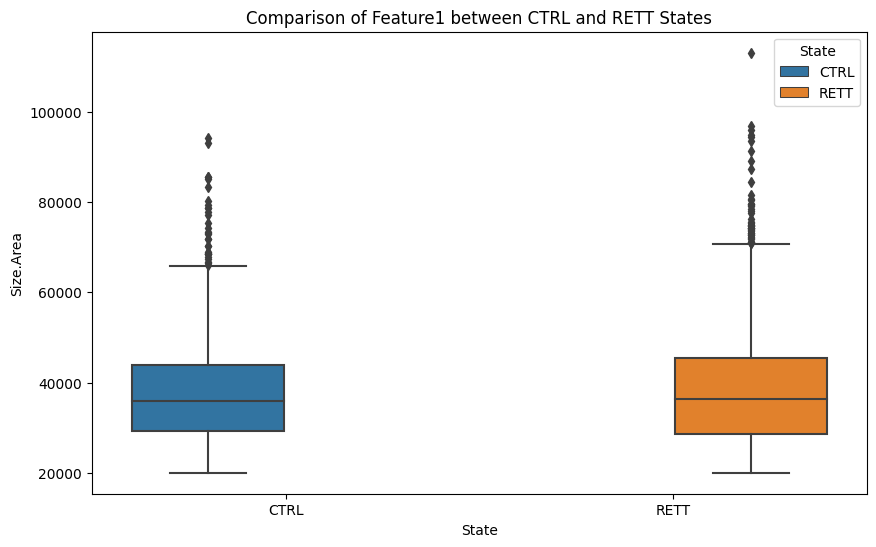

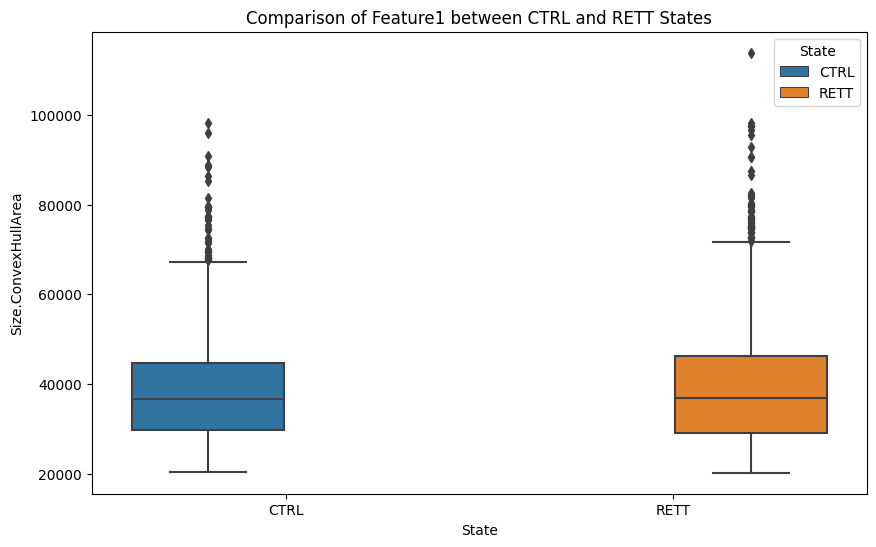

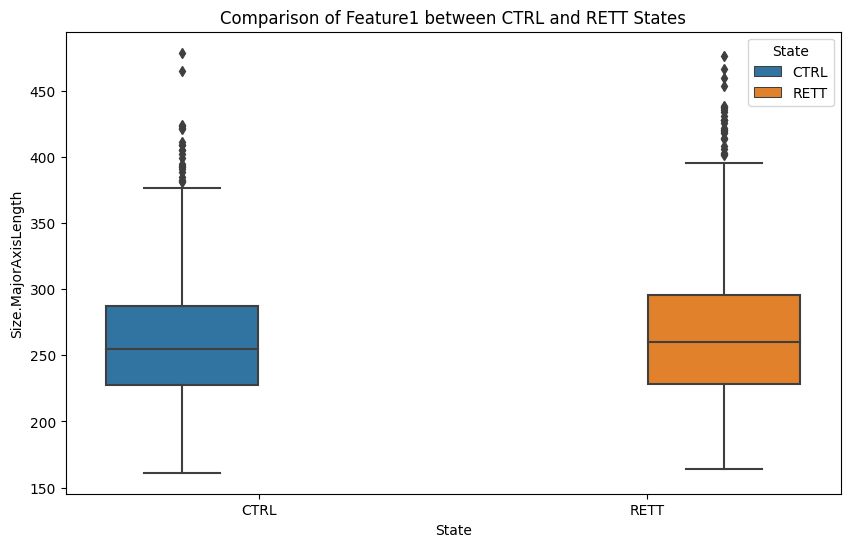

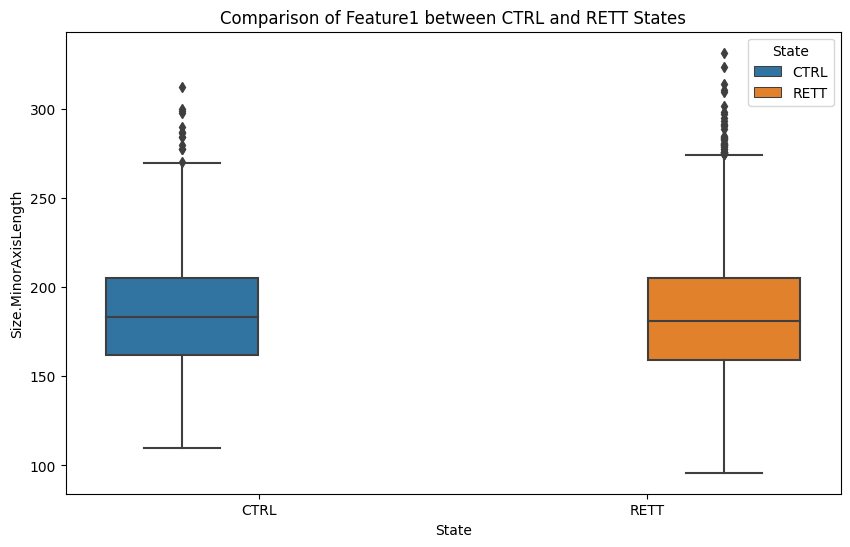

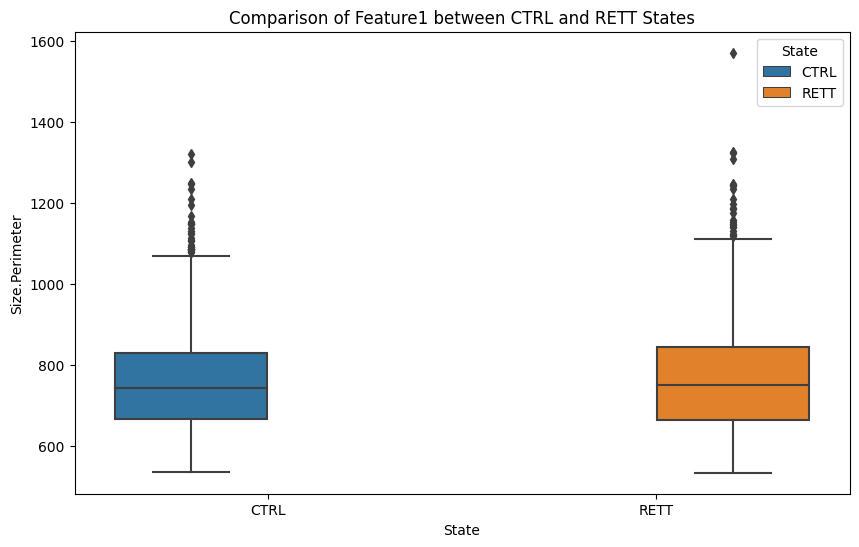

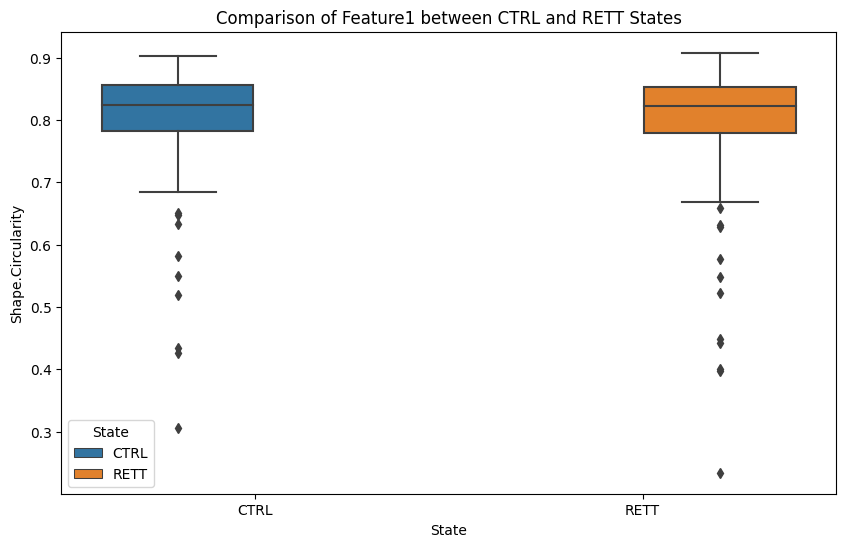

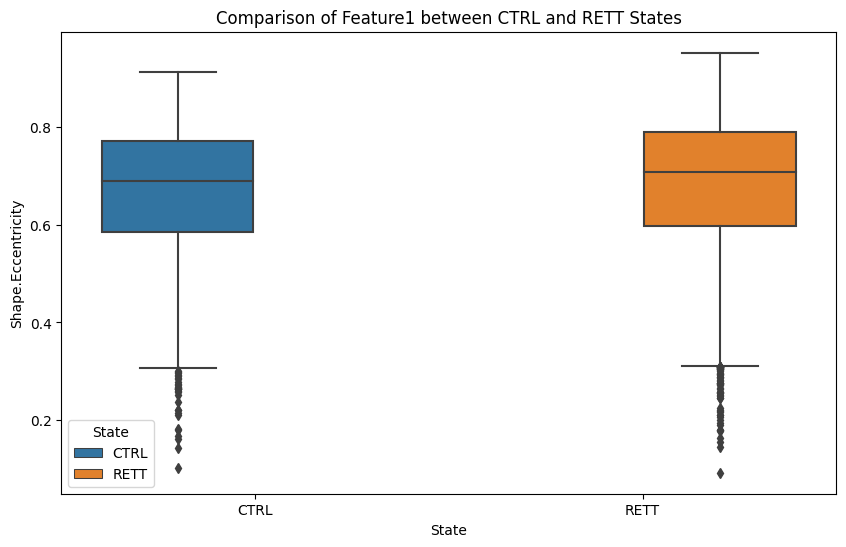

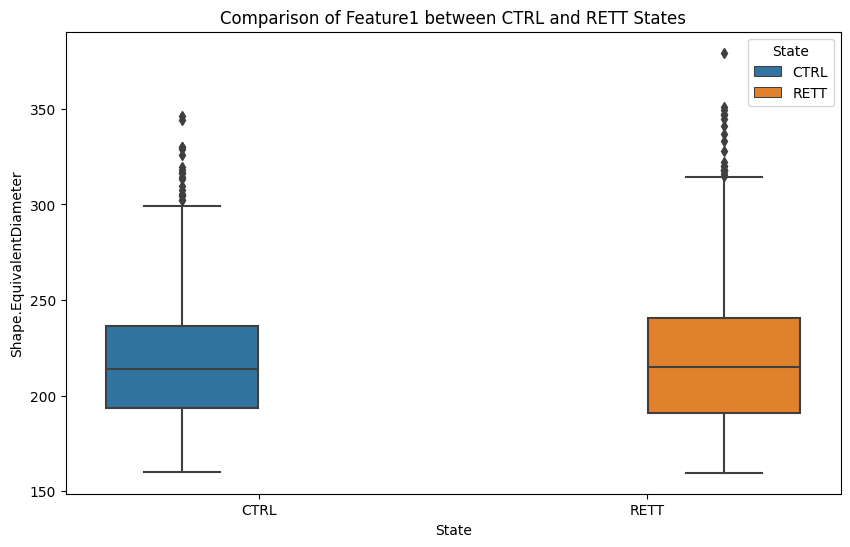

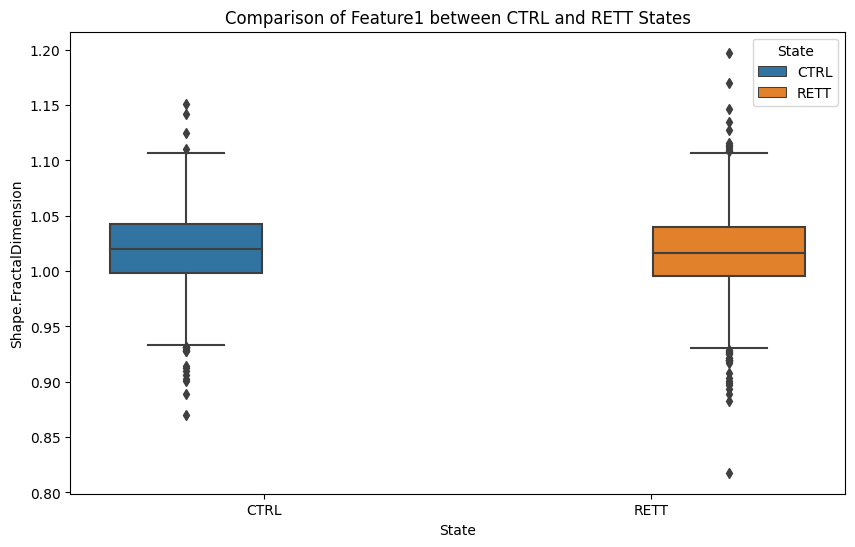

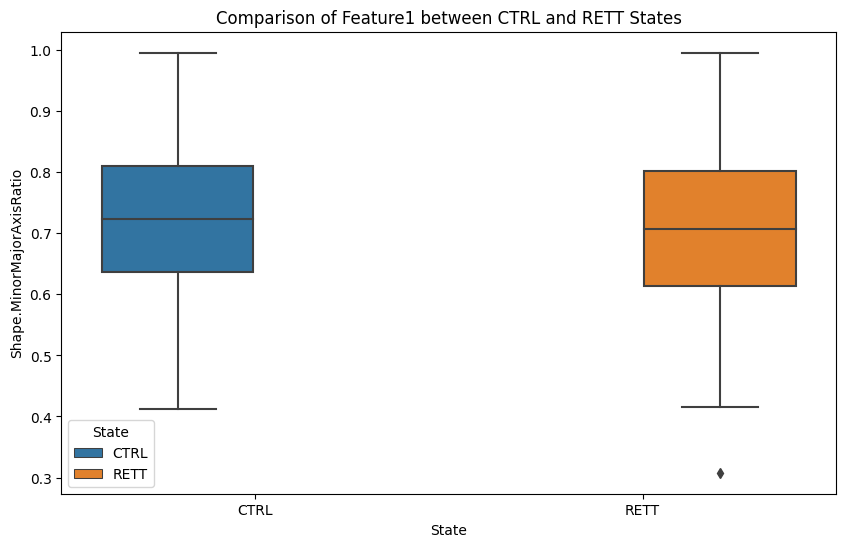

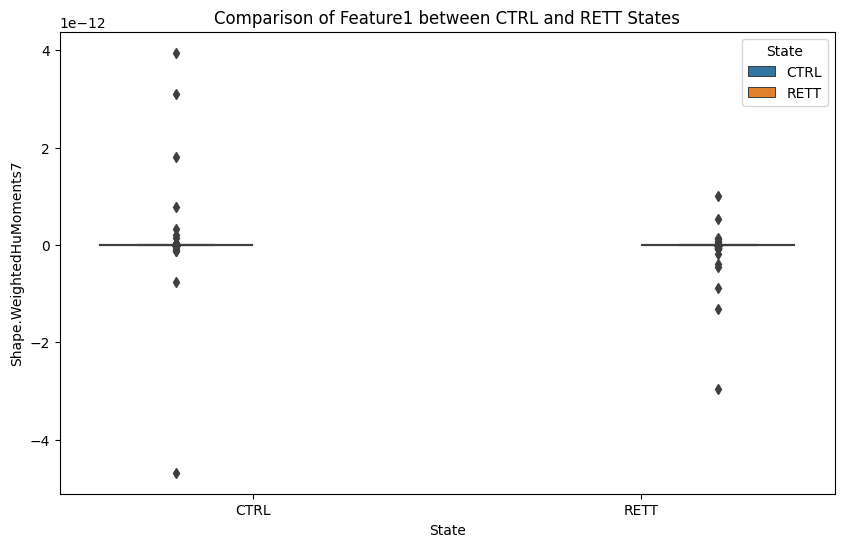

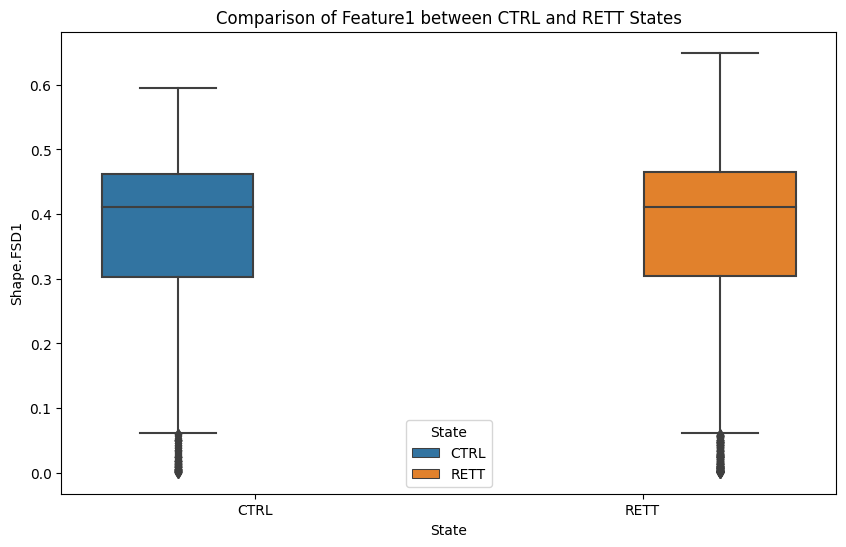

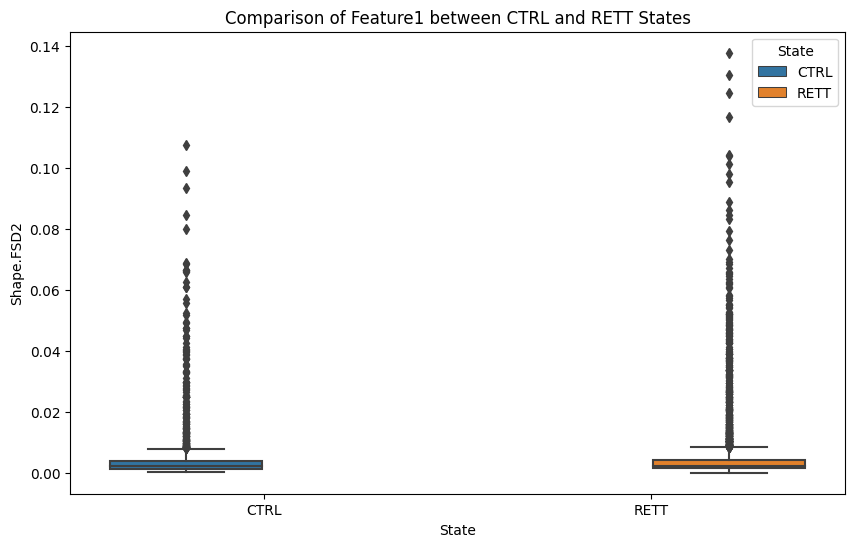

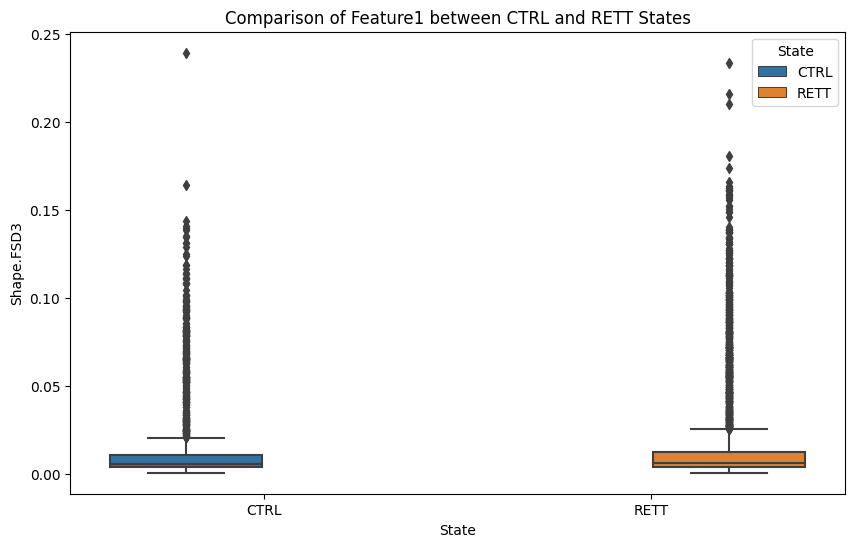

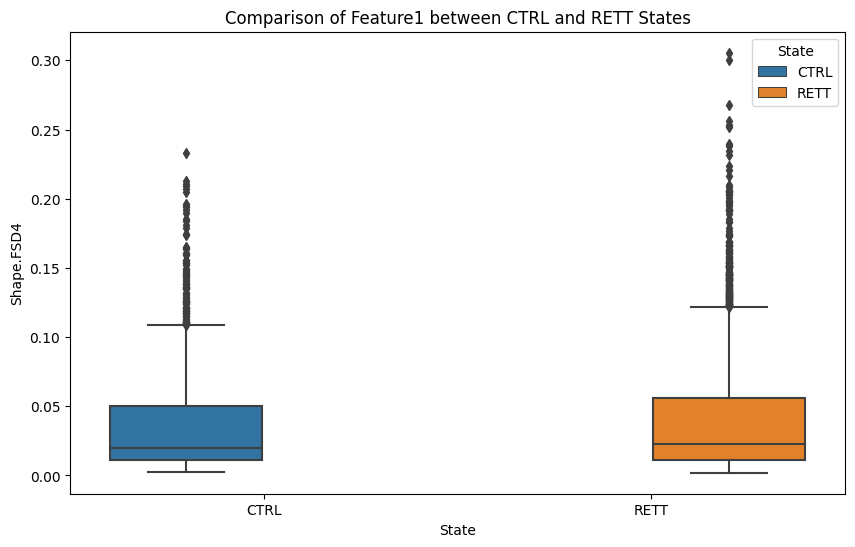

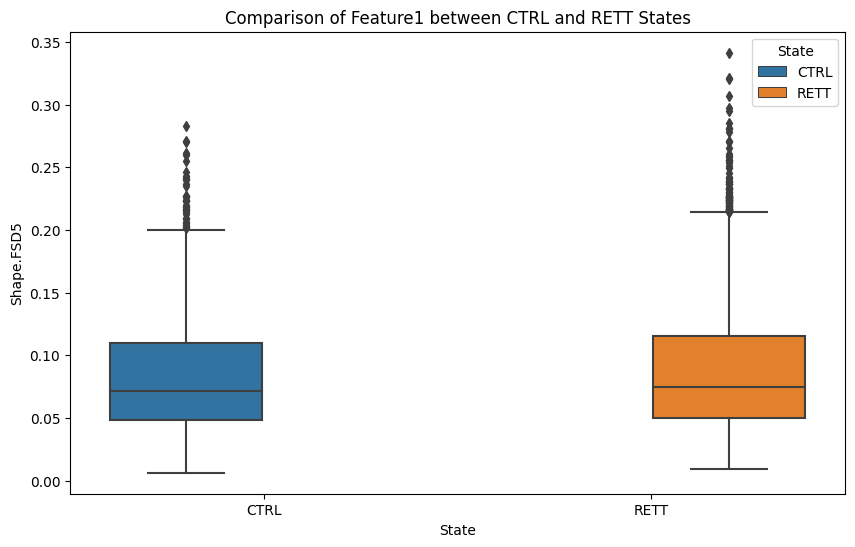

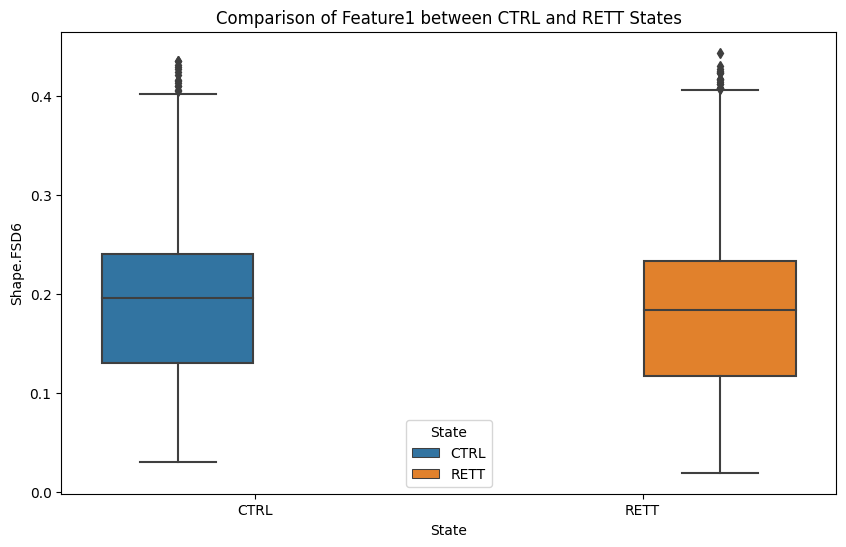

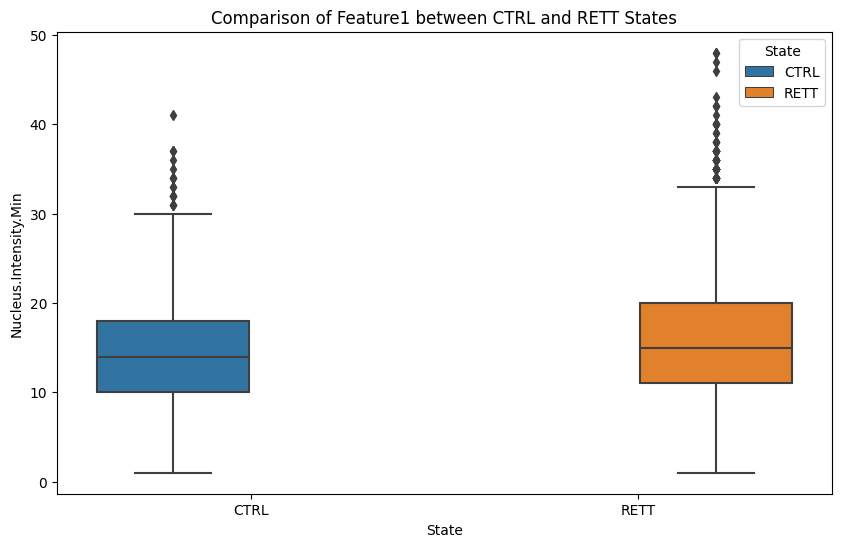

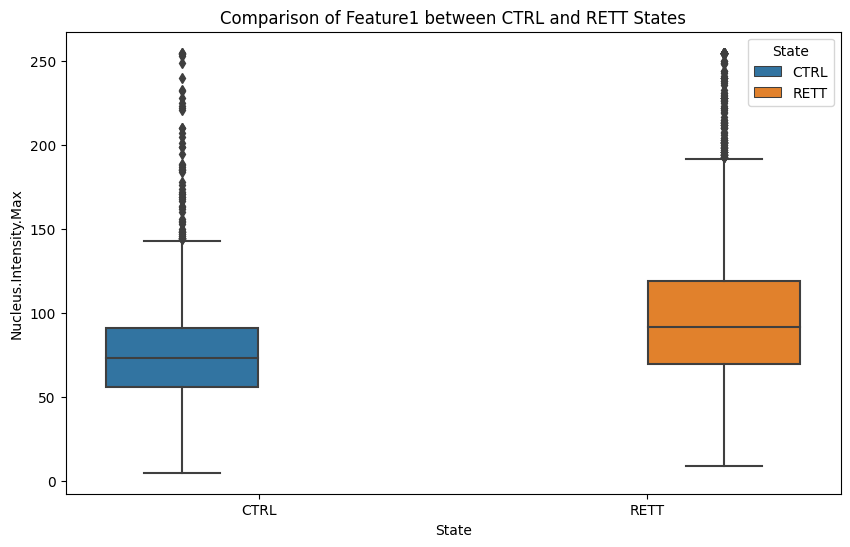

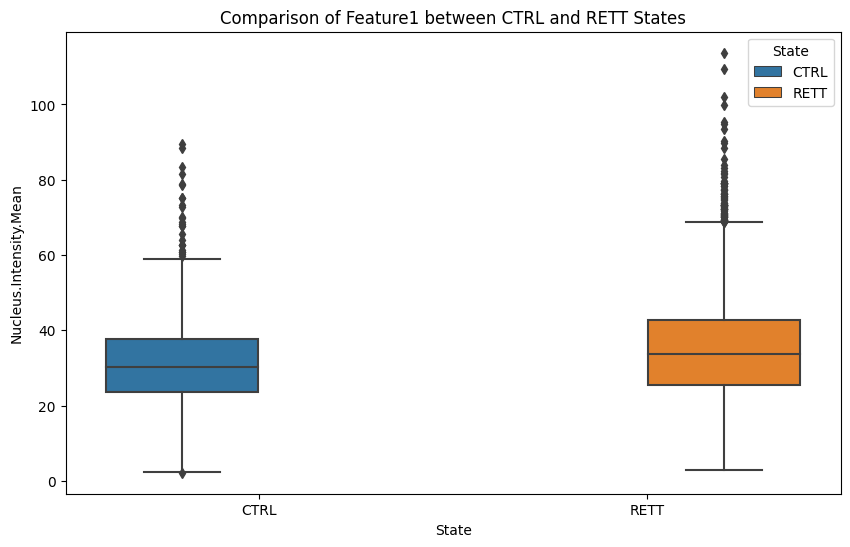

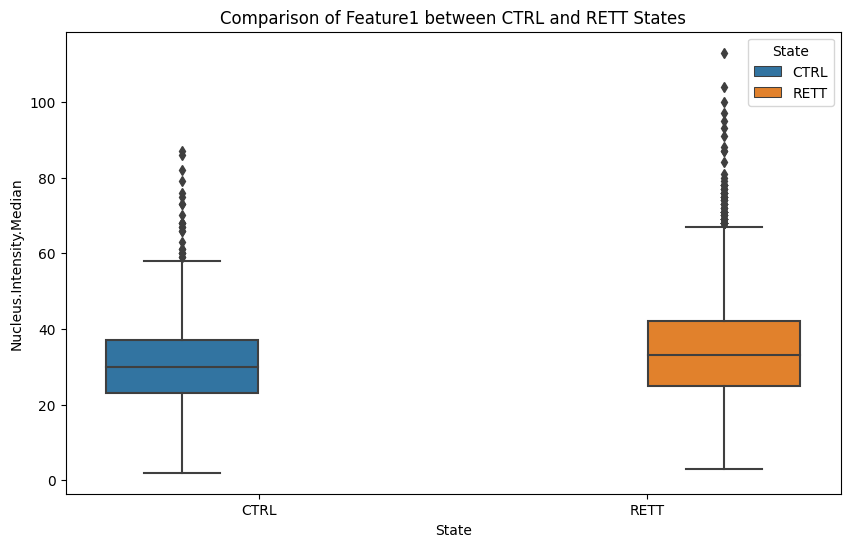

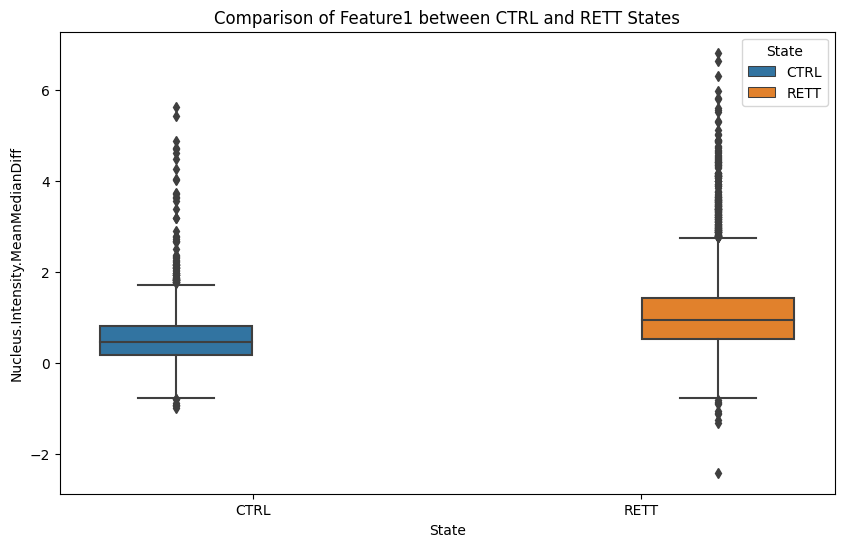

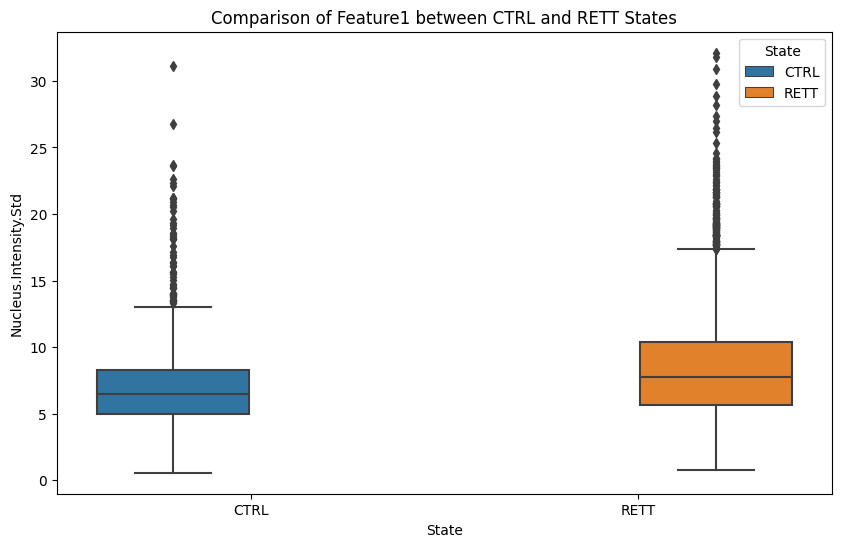

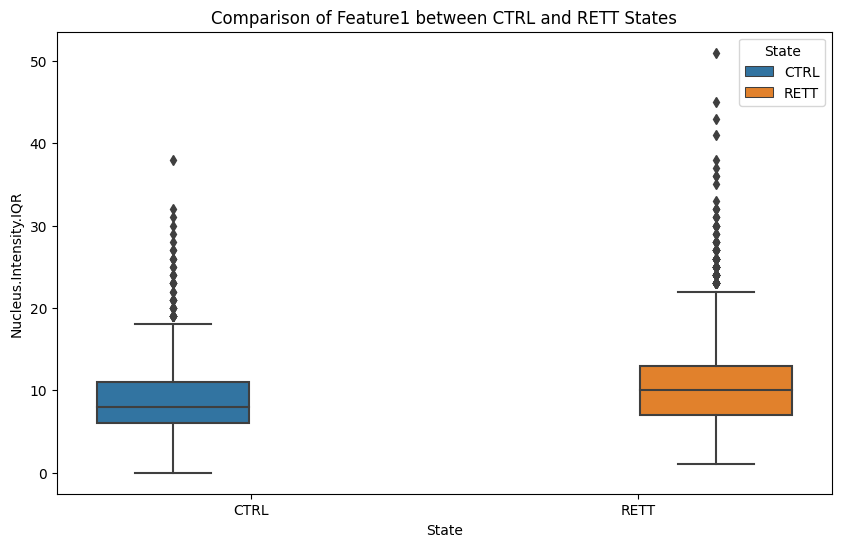

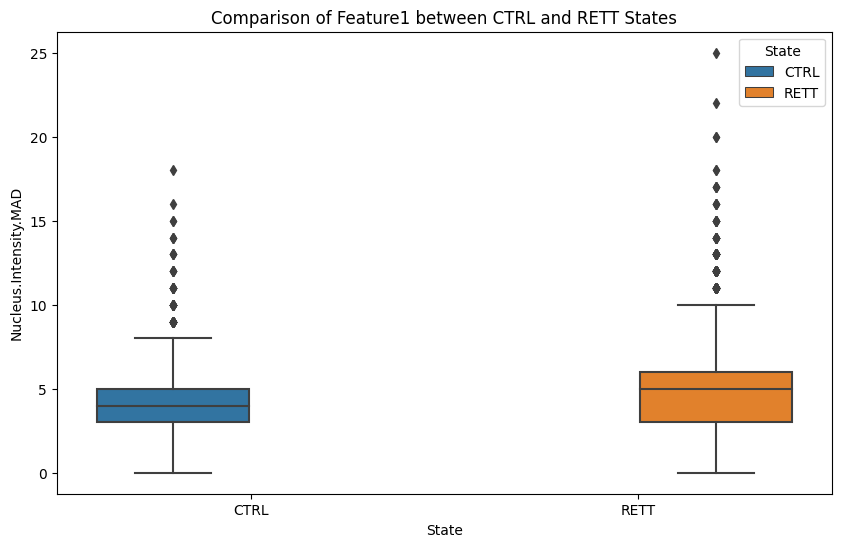

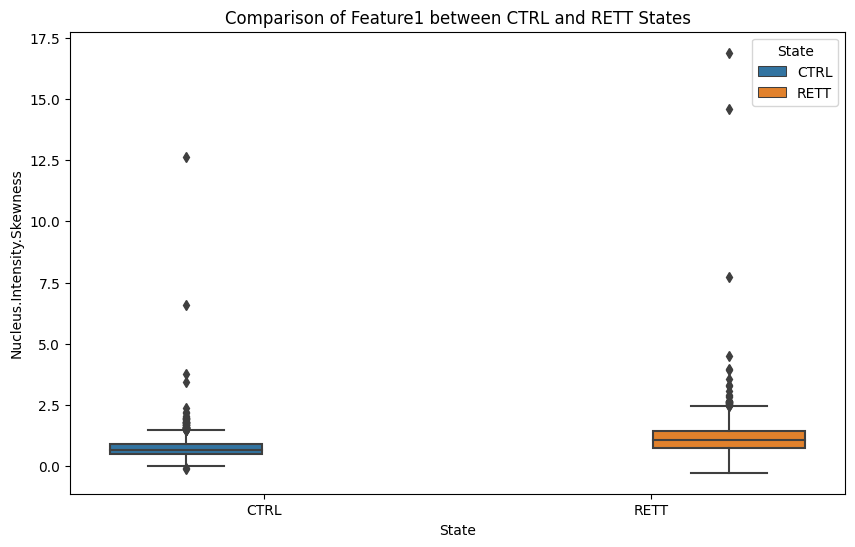

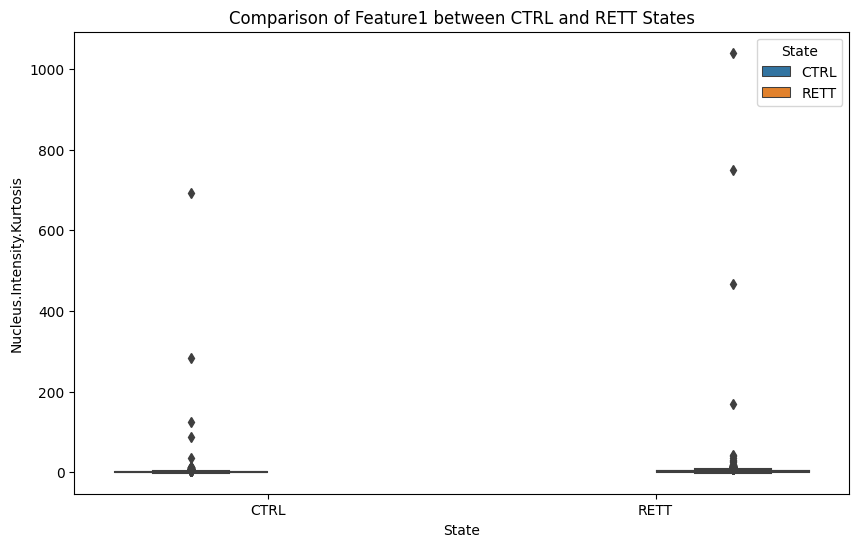

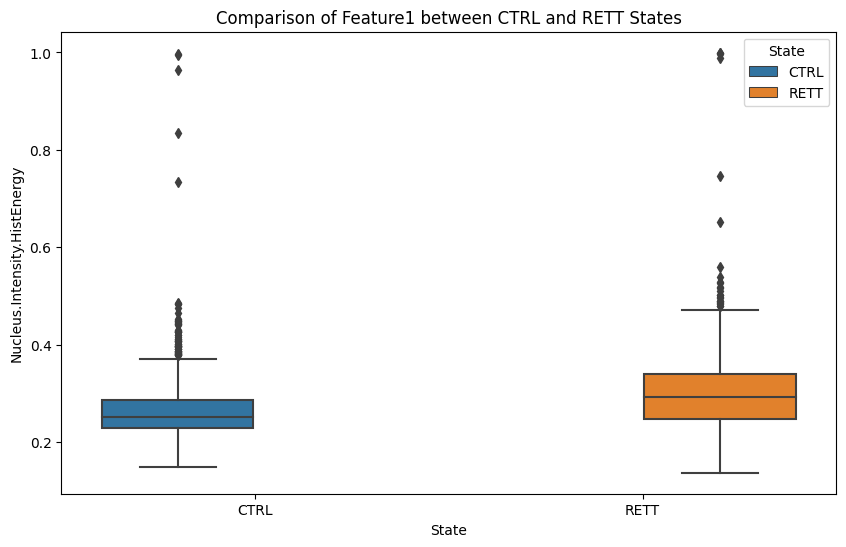

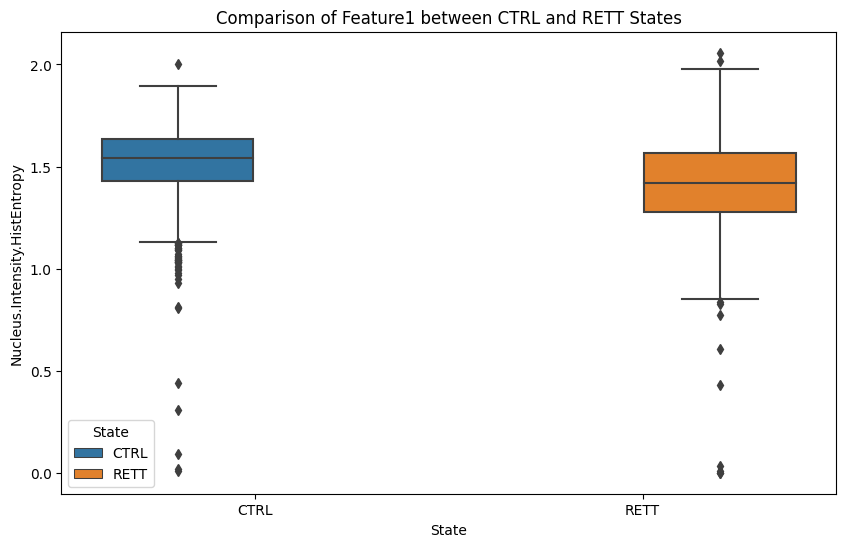

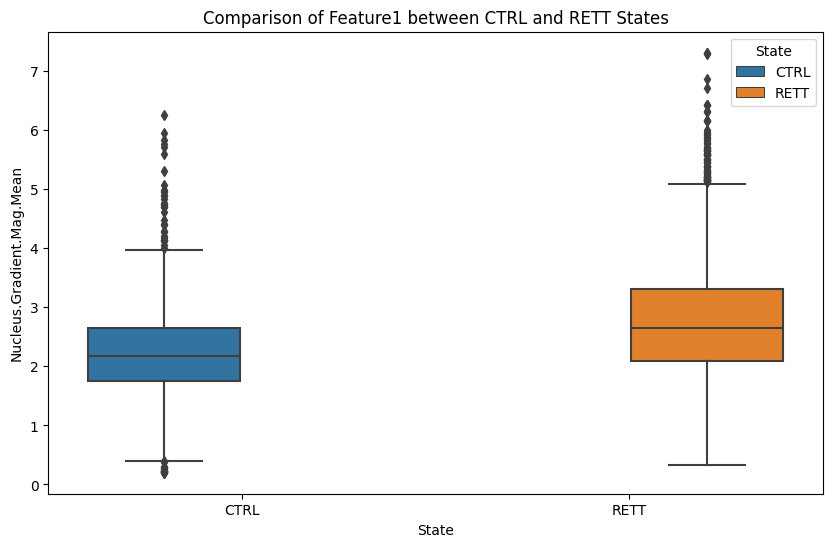

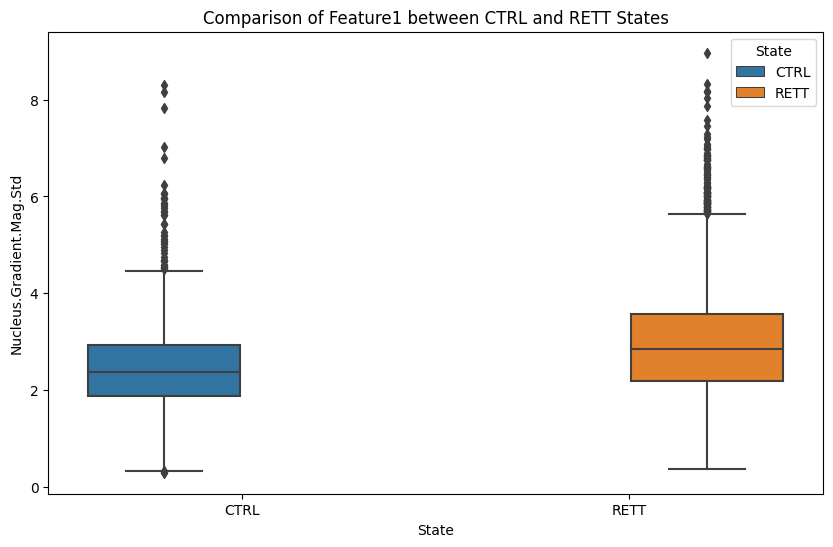

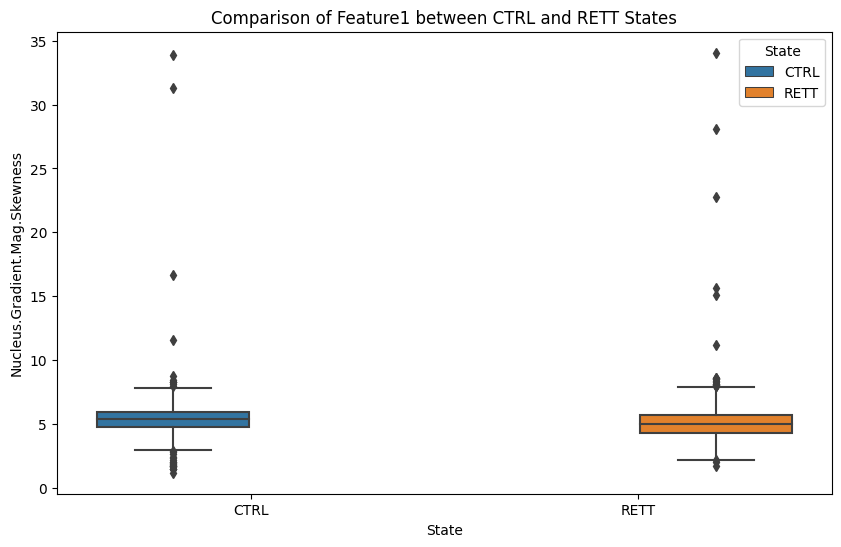

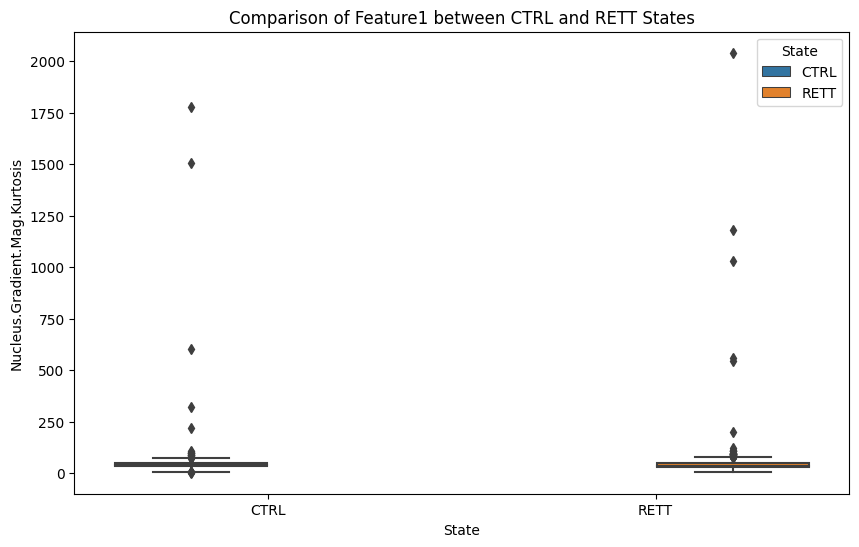

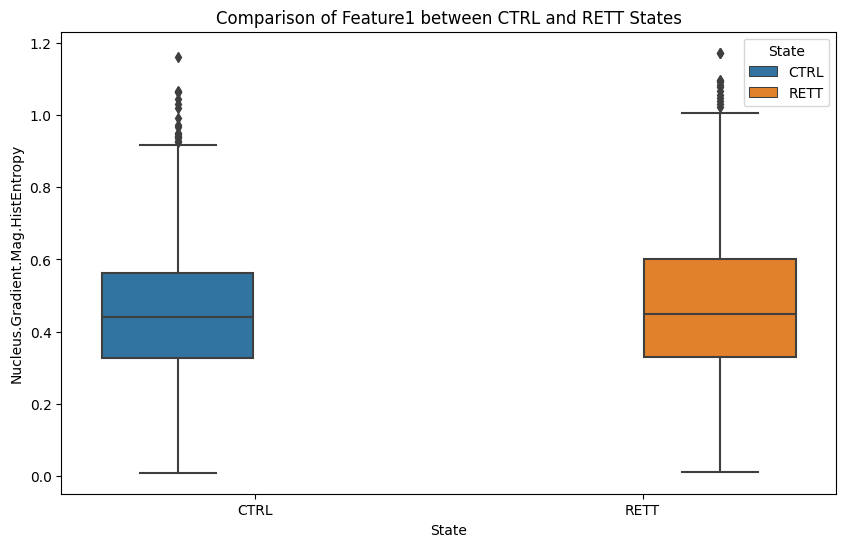

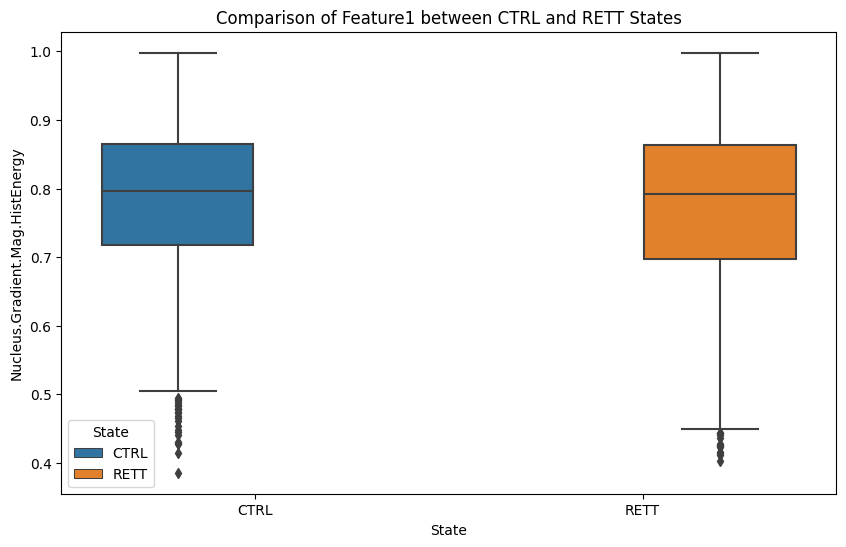

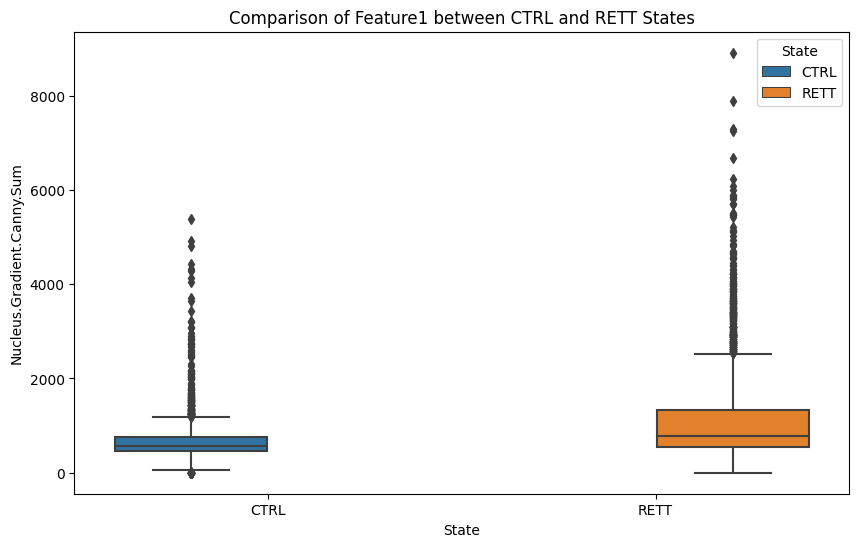

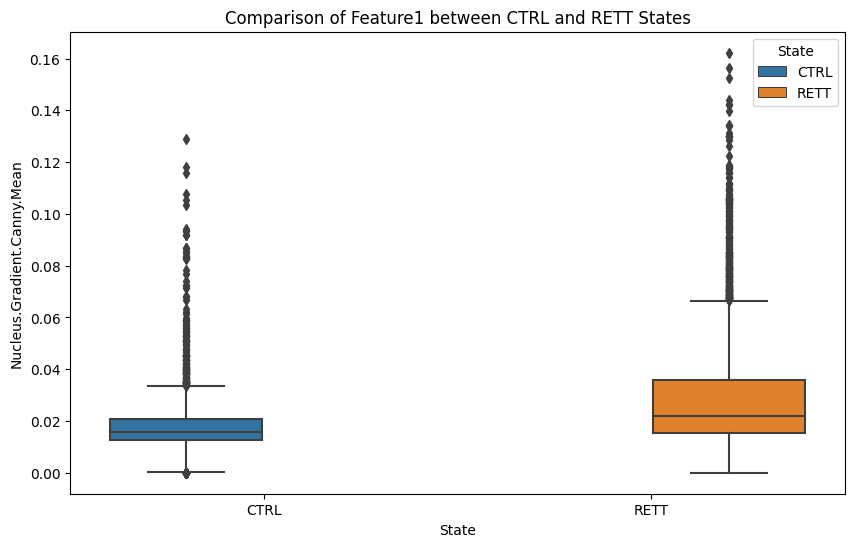

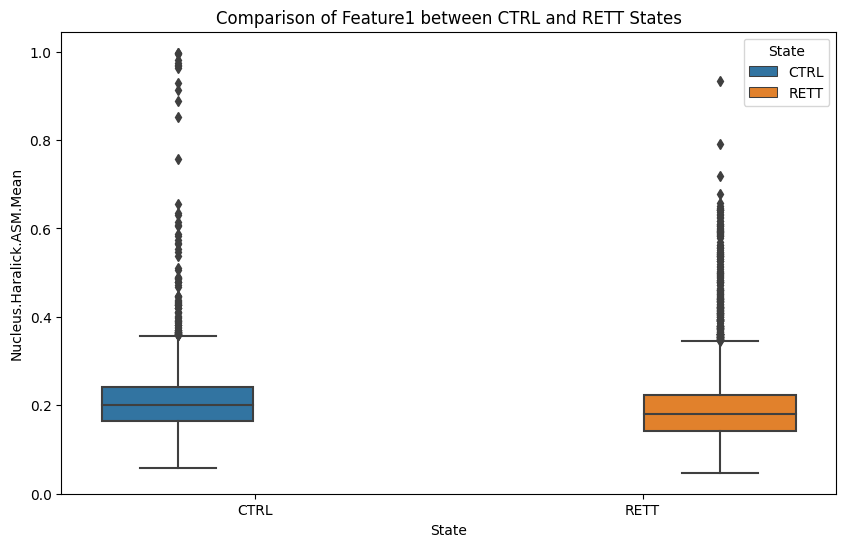

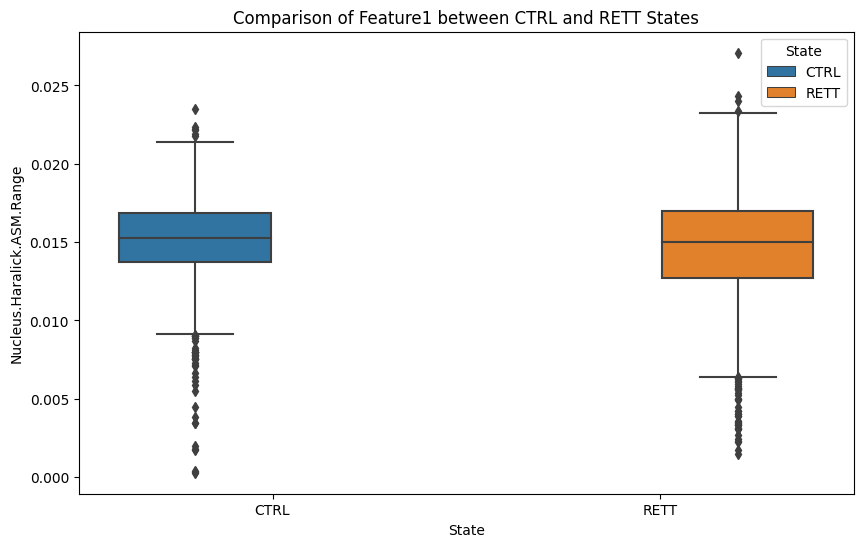

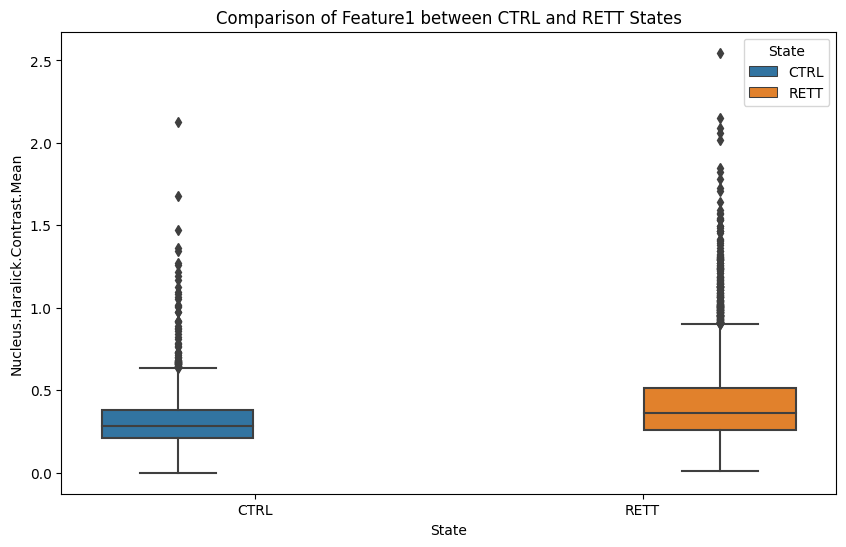

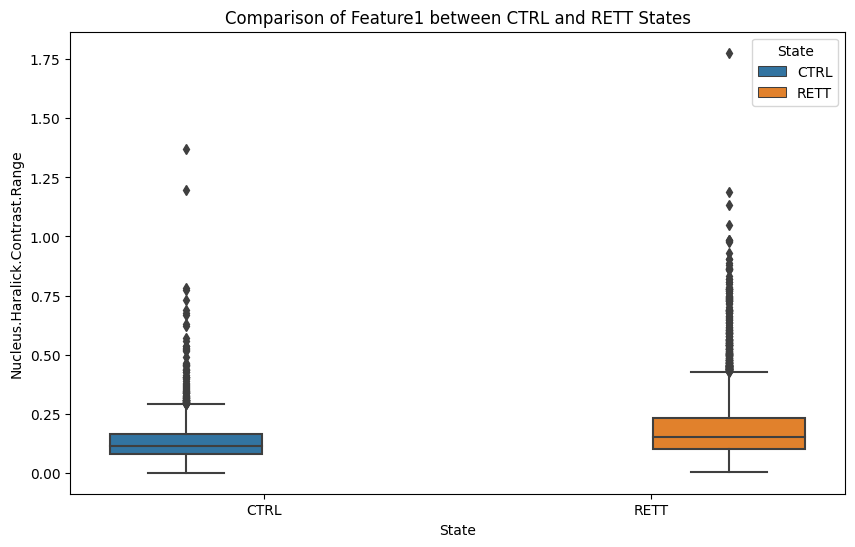

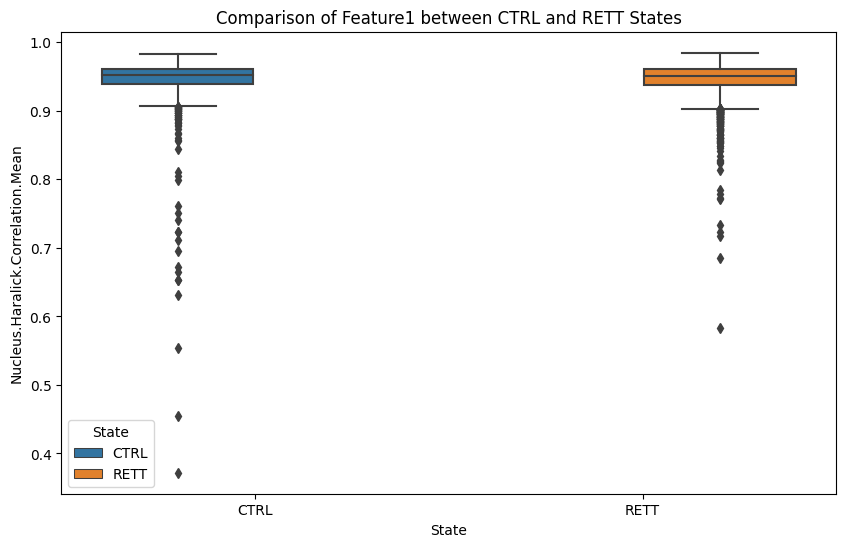

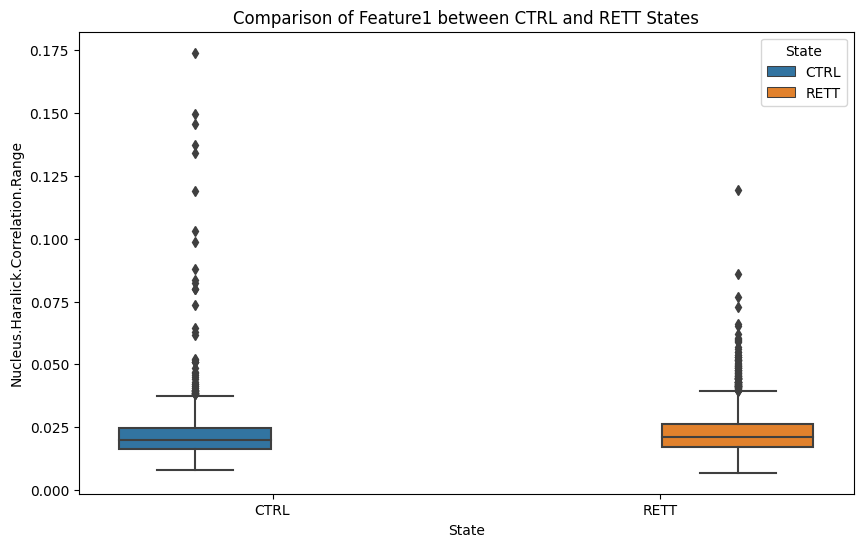

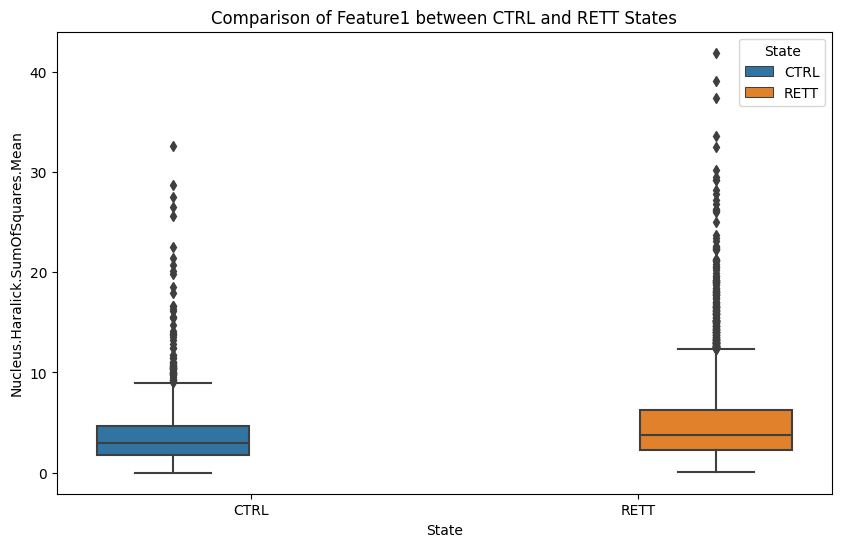

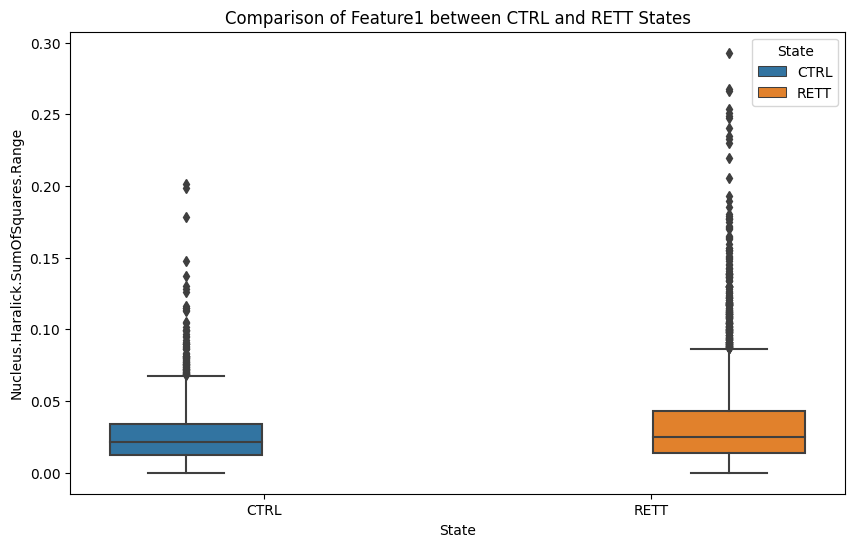

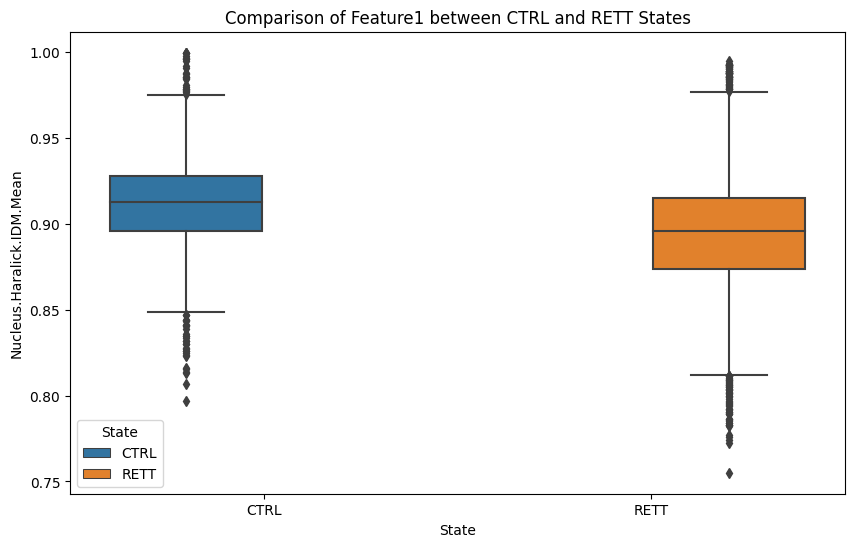

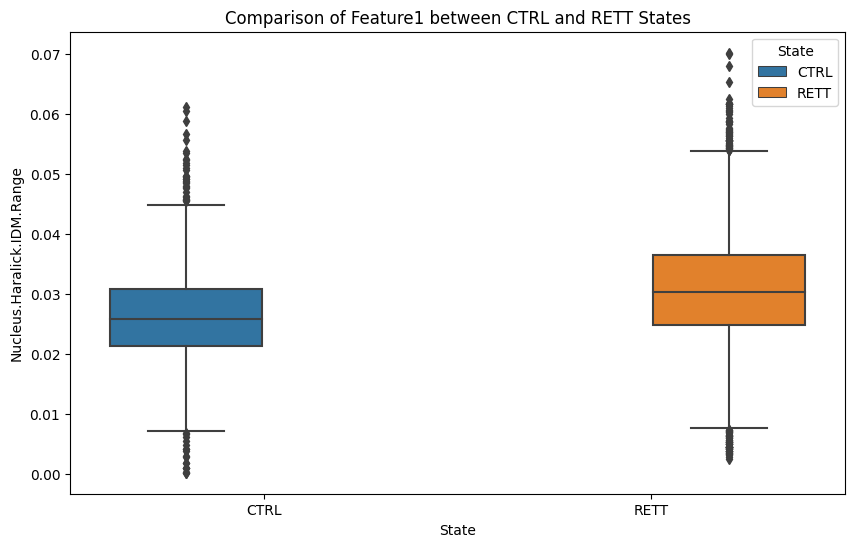

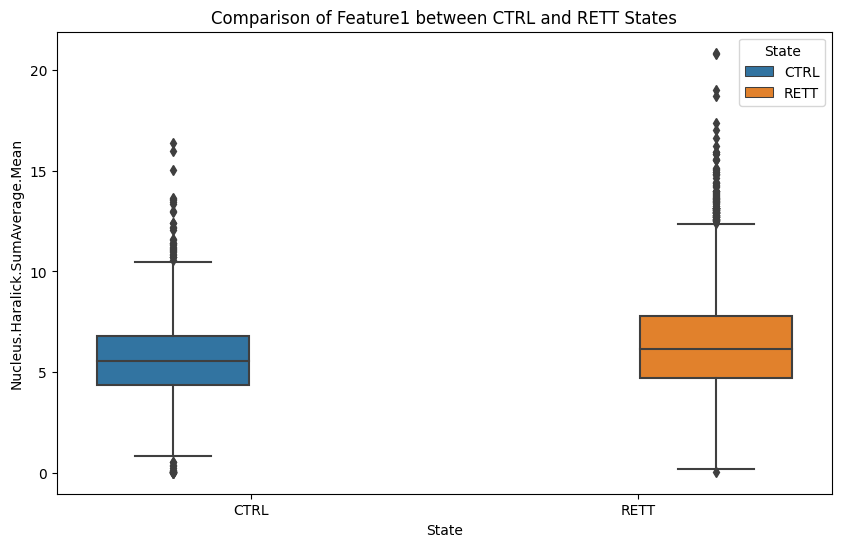

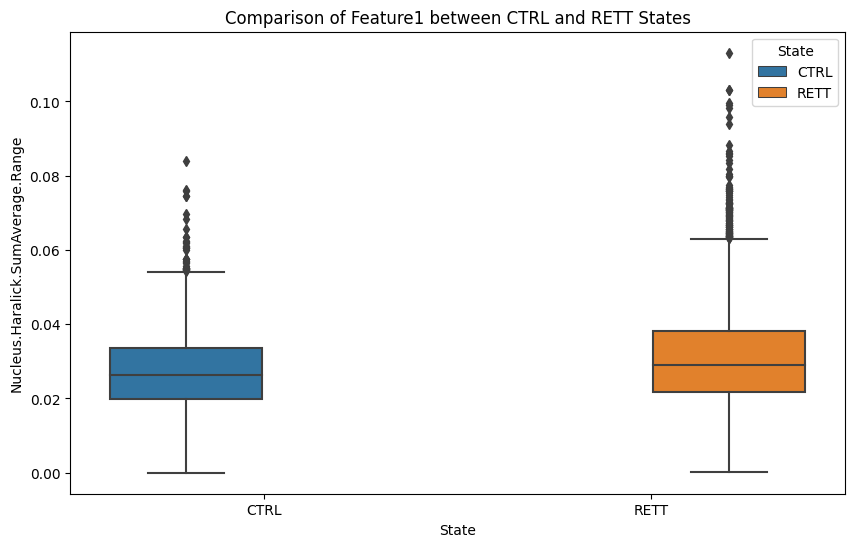

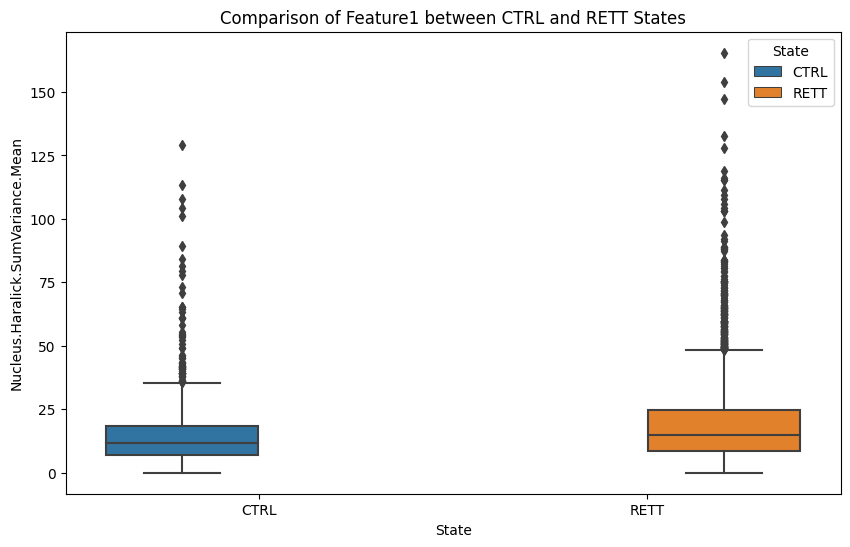

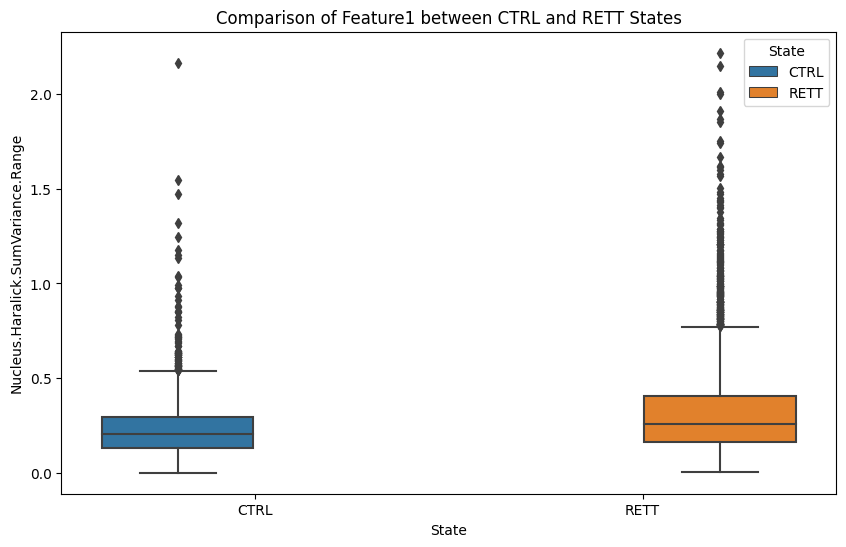

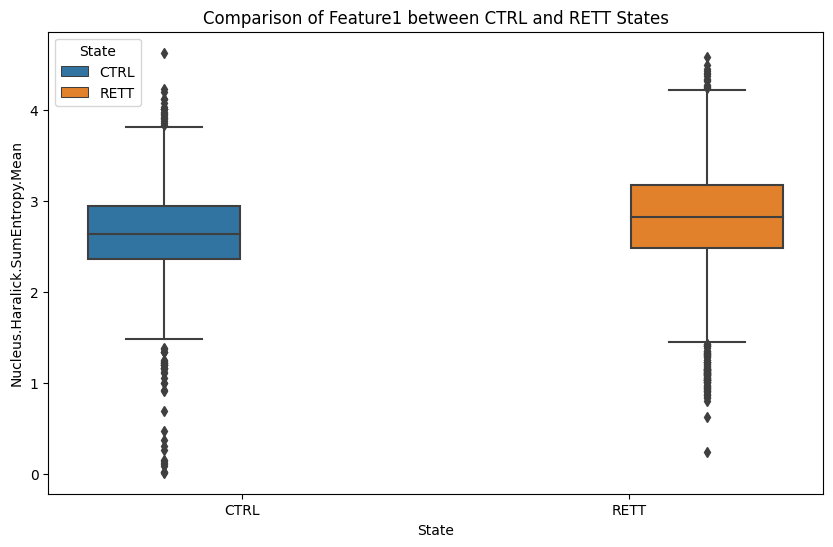

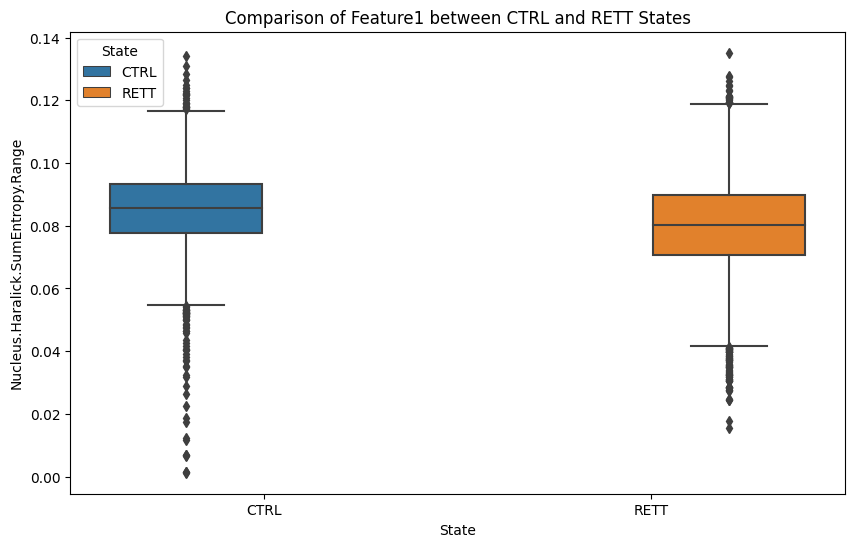

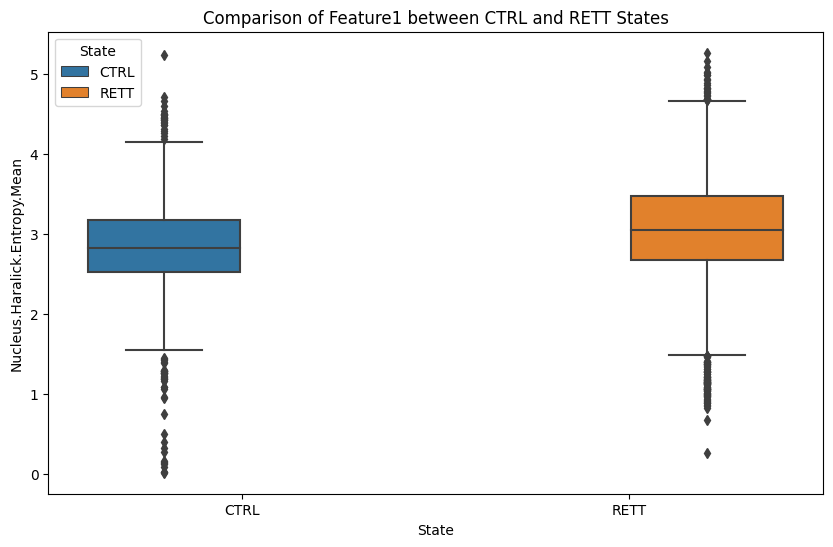

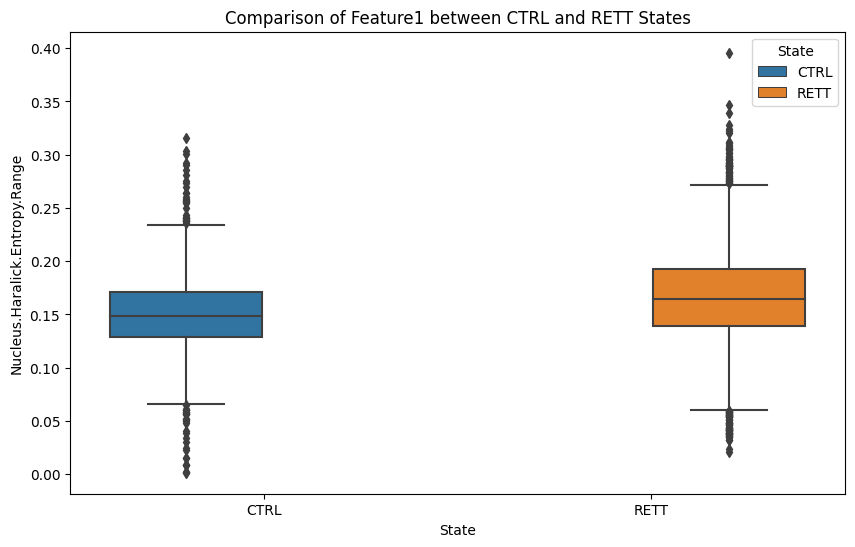

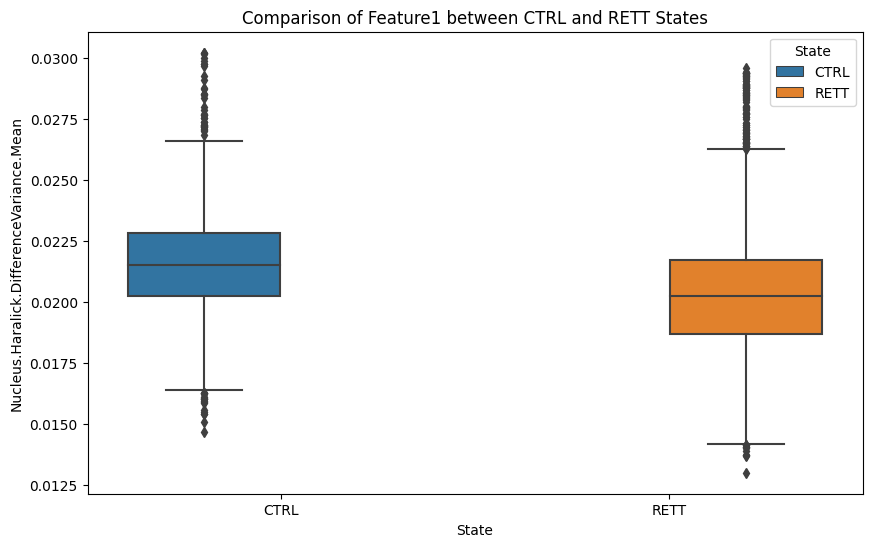

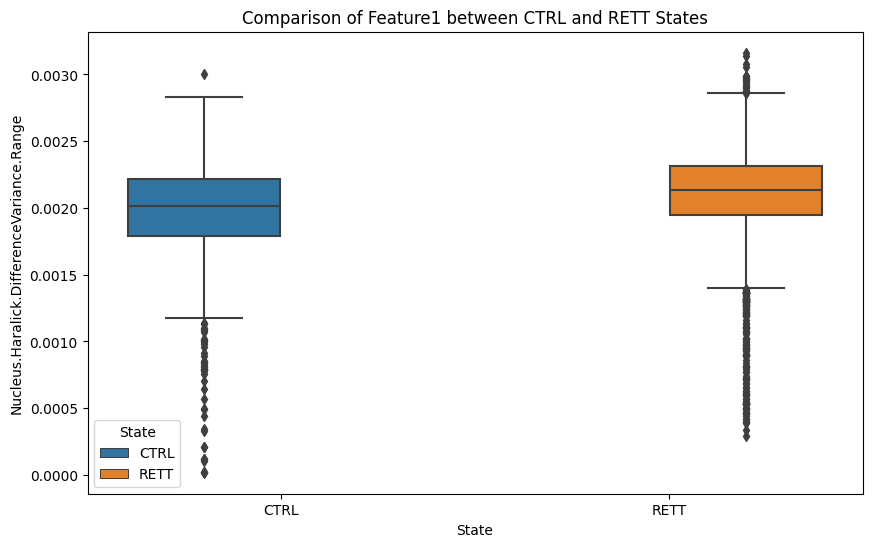

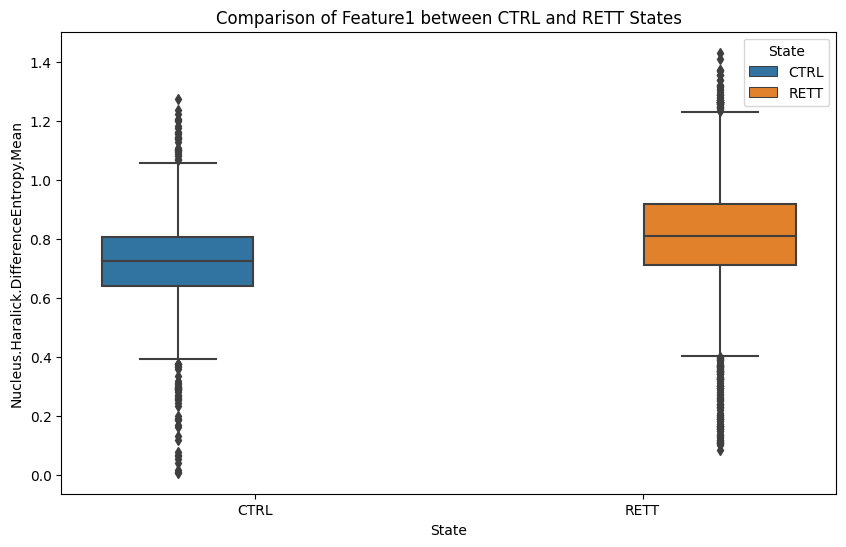

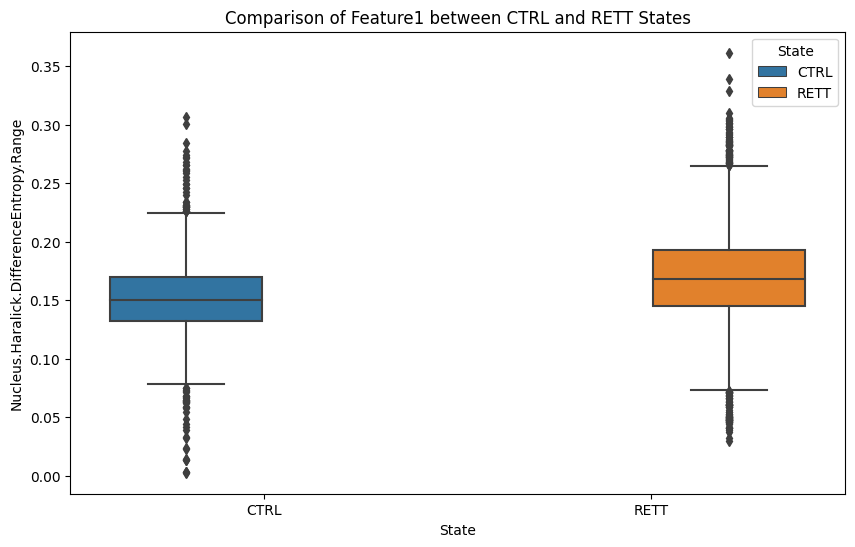

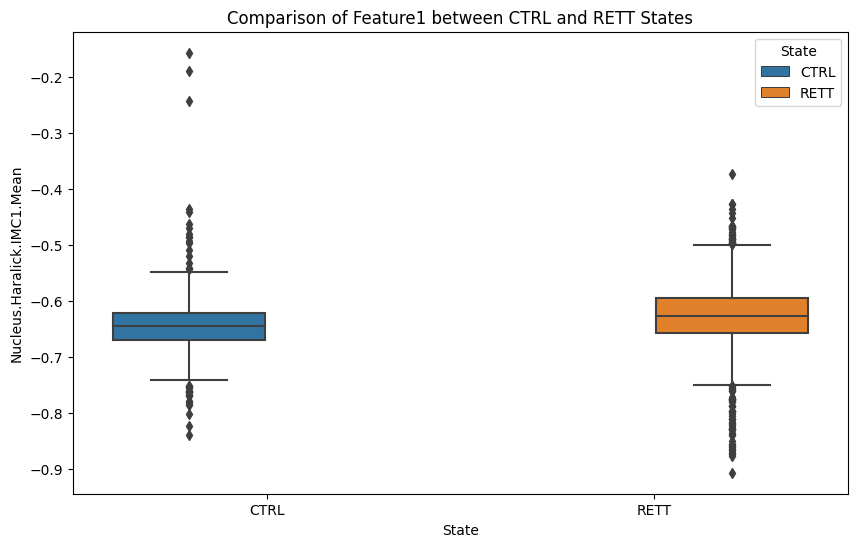

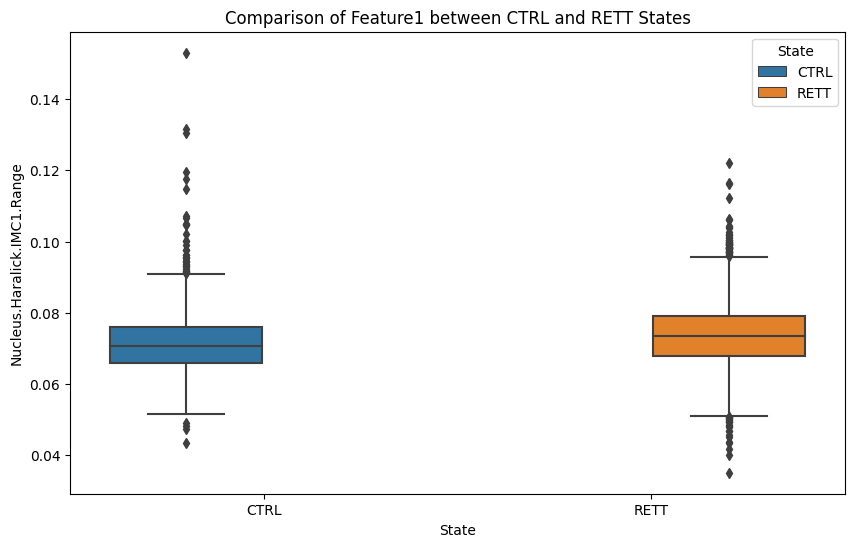

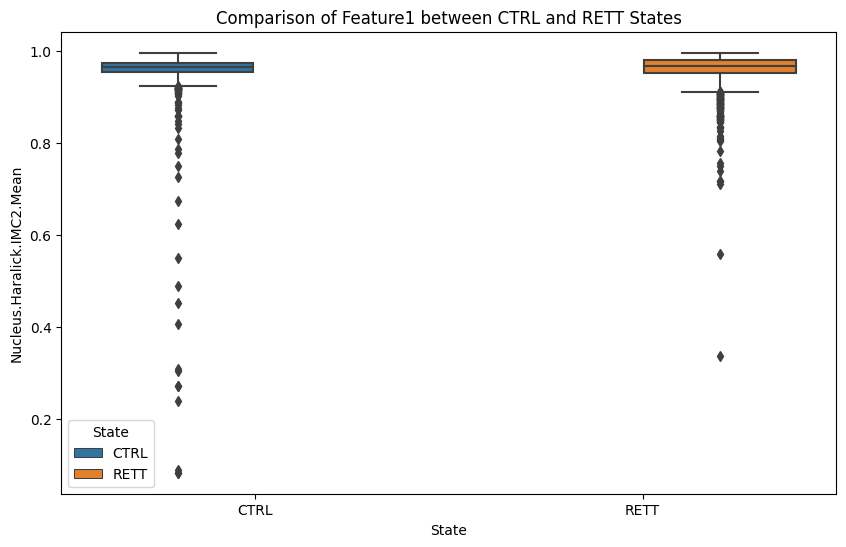

In [30]:
# 箱型图比较两个状态下的一个特征
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_combined, x='State', y=feature, hue='State')  # 替换 'Feature1' 为具体特征名
    plt.title('Comparison of Feature1 between CTRL and RETT States')
    plt.legend(title='State')
    plt.show()

# # 小提琴图
# plt.figure(figsize=(12, 6))
# sns.violinplot(data=df, x='feature_column', y='value_column', hue='State', split=True)
# plt.title('Violin Plot of Features by State')
# plt.show()

# # 平行坐标图
# from pandas.plotting import parallel_coordinates
# plt.figure(figsize=(12, 6))
# parallel_coordinates(df, 'State', colormap=plt.get_cmap("Set1"))
# plt.title('Parallel Coordinates Plot by State')
# plt.show()

# All TEST

🌸 Feature_GradCAM/features_RETT_All_Resnet10_noavg_GradCAM.csv
🌼 Feature_GradCAM/features_CTRL_All_Resnet10_noavg_GradCAM.csv
####################################################
####################################################
🛎️ ttest
                                      Feature        p_value
37                 Nucleus.Haralick.ASM.Range   0.000000e+00
36                  Nucleus.Haralick.ASM.Mean   0.000000e+00
65              Intensity.distribution.part02   0.000000e+00
40          Nucleus.Haralick.Correlation.Mean   0.000000e+00
41         Nucleus.Haralick.Correlation.Range   0.000000e+00
46           Nucleus.Haralick.SumAverage.Mean   0.000000e+00
50           Nucleus.Haralick.SumEntropy.Mean   0.000000e+00
51          Nucleus.Haralick.SumEntropy.Range   0.000000e+00
52              Nucleus.Haralick.Entropy.Mean   0.000000e+00
58                 Nucleus.Haralick.IMC1.Mean   0.000000e+00
59                Nucleus.Haralick.IMC1.Range   0.000000e+00
60                 Nucleus.

/var/folders/gw/yht_b0cx69z8nmt9zhpdj8t00000gp/T/ipykernel_41817/2118762723.py:17: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_val = ttest_ind(


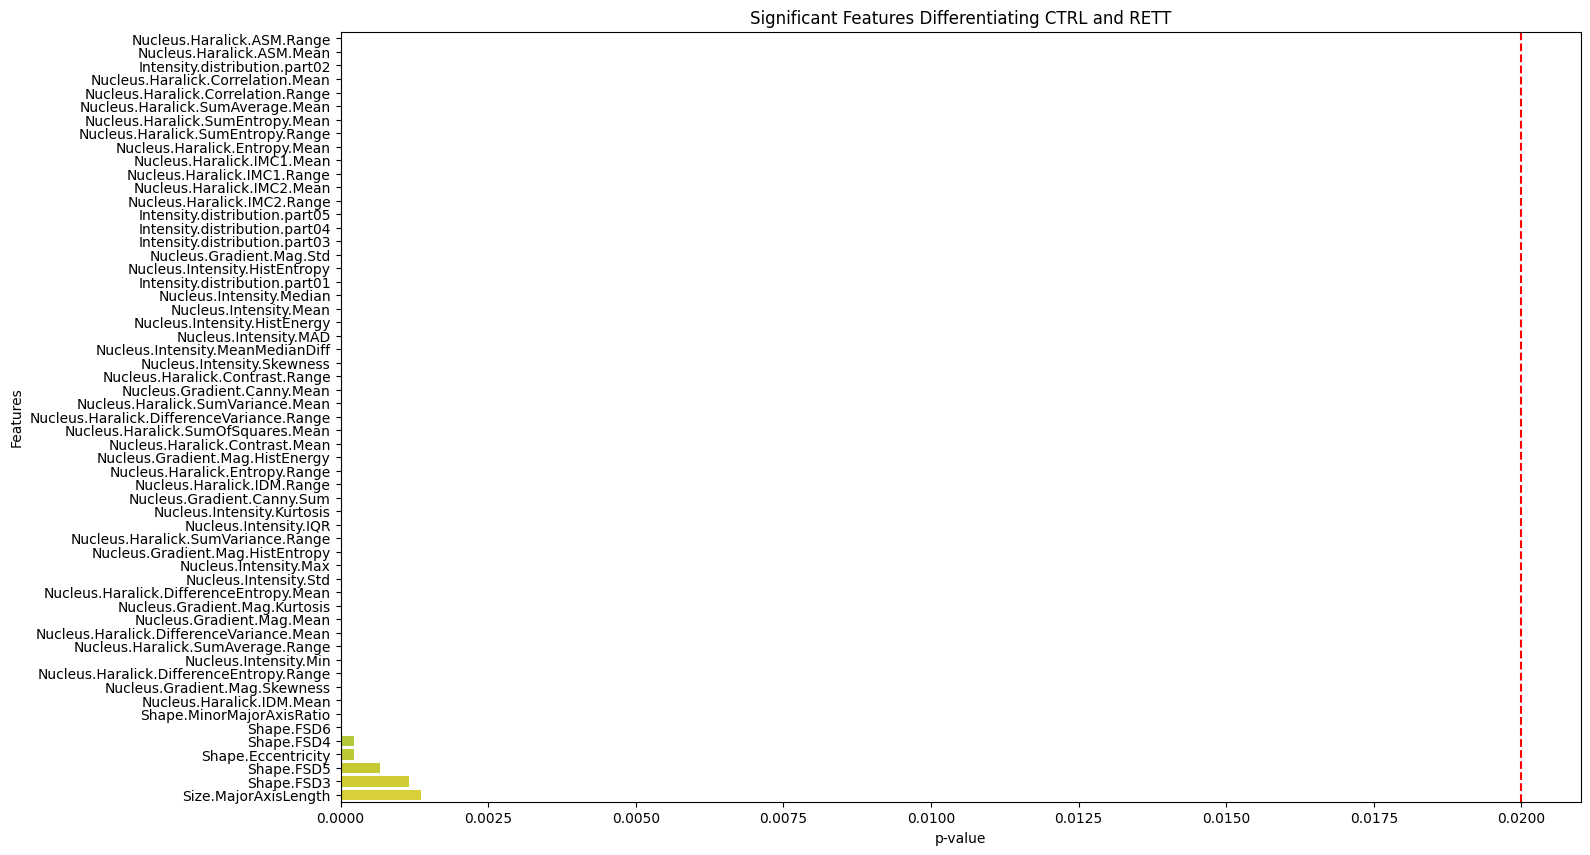

####################################################
####################################################
🛎️ PCA


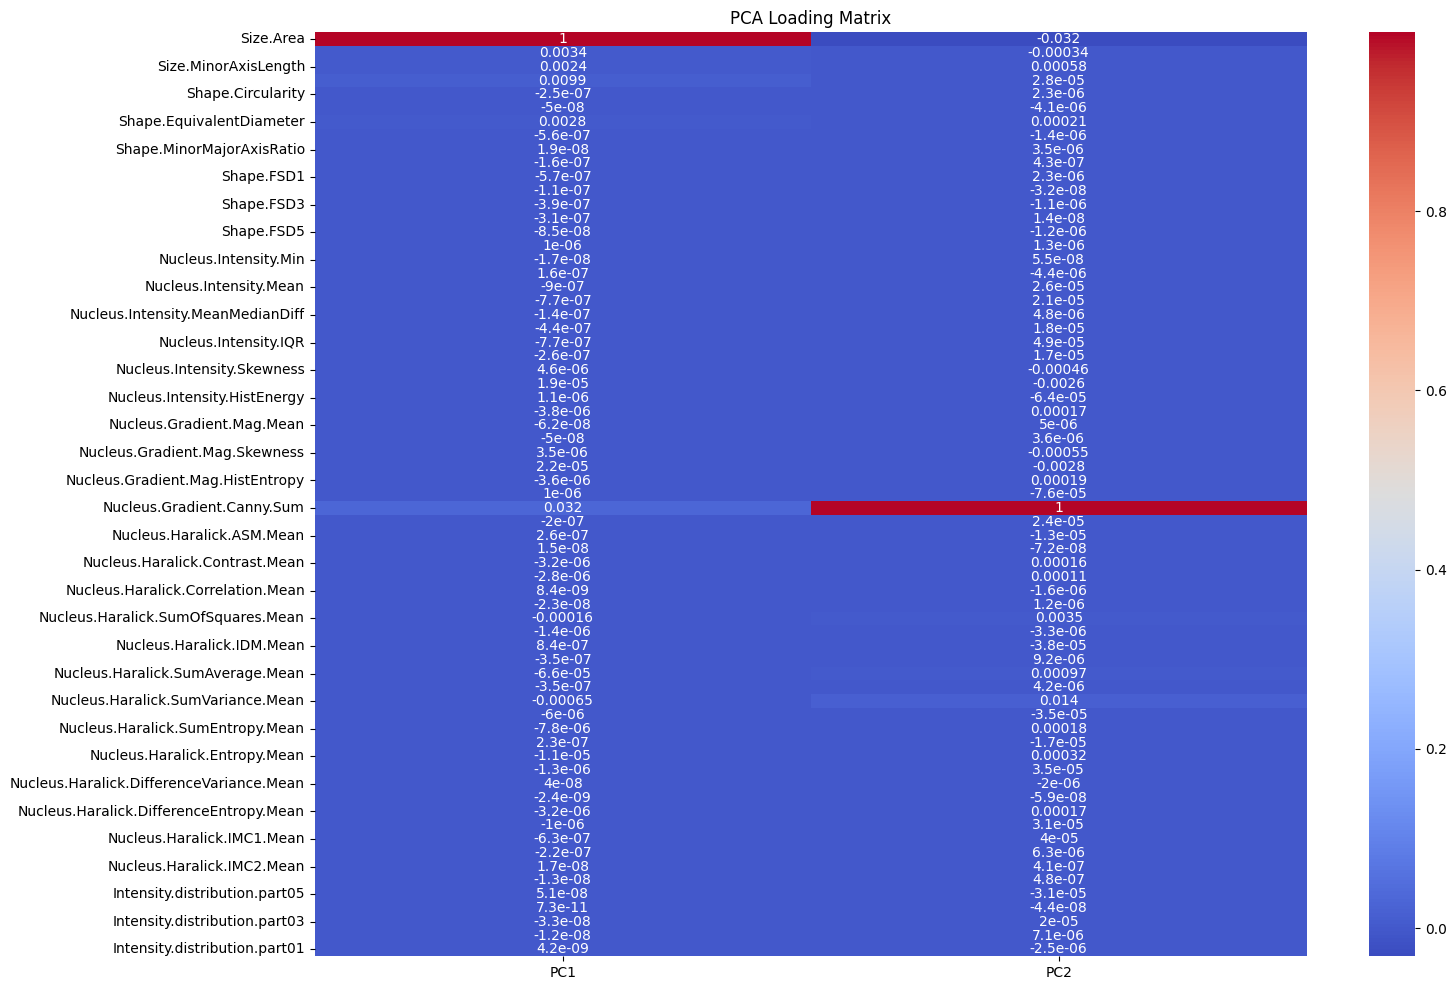

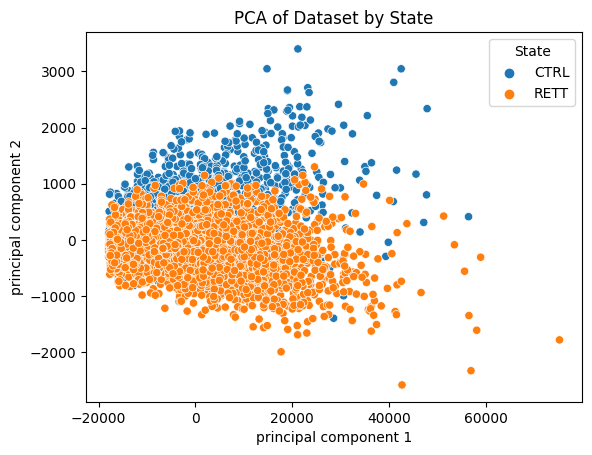

####################################################
####################################################
🛎️ t-SNE


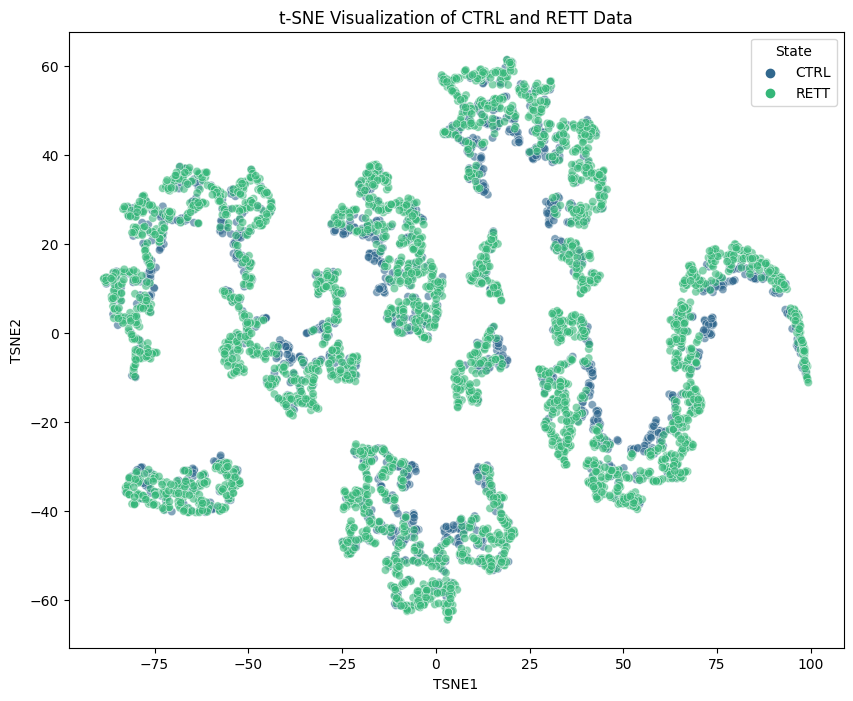

🌸 Feature_GradCAM/features_RETT_H3K27ac_Resnet10_noavg_GradCAM.csv
🌼 Feature_GradCAM/features_CTRL_H3K27ac_Resnet10_noavg_GradCAM.csv
####################################################
####################################################
🛎️ ttest
                                      Feature        p_value
38             Nucleus.Haralick.Contrast.Mean   0.000000e+00
64              Intensity.distribution.part03   0.000000e+00
63              Intensity.distribution.part04   0.000000e+00
62              Intensity.distribution.part05   0.000000e+00
61                Nucleus.Haralick.IMC2.Range   0.000000e+00
59                Nucleus.Haralick.IMC1.Range   0.000000e+00
58                 Nucleus.Haralick.IMC1.Mean   0.000000e+00
57   Nucleus.Haralick.DifferenceEntropy.Range   0.000000e+00
51          Nucleus.Haralick.SumEntropy.Range   0.000000e+00
39            Nucleus.Haralick.Contrast.Range   0.000000e+00
65              Intensity.distribution.part02   0.000000e+00
35                N

/var/folders/gw/yht_b0cx69z8nmt9zhpdj8t00000gp/T/ipykernel_41817/2118762723.py:17: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_val = ttest_ind(


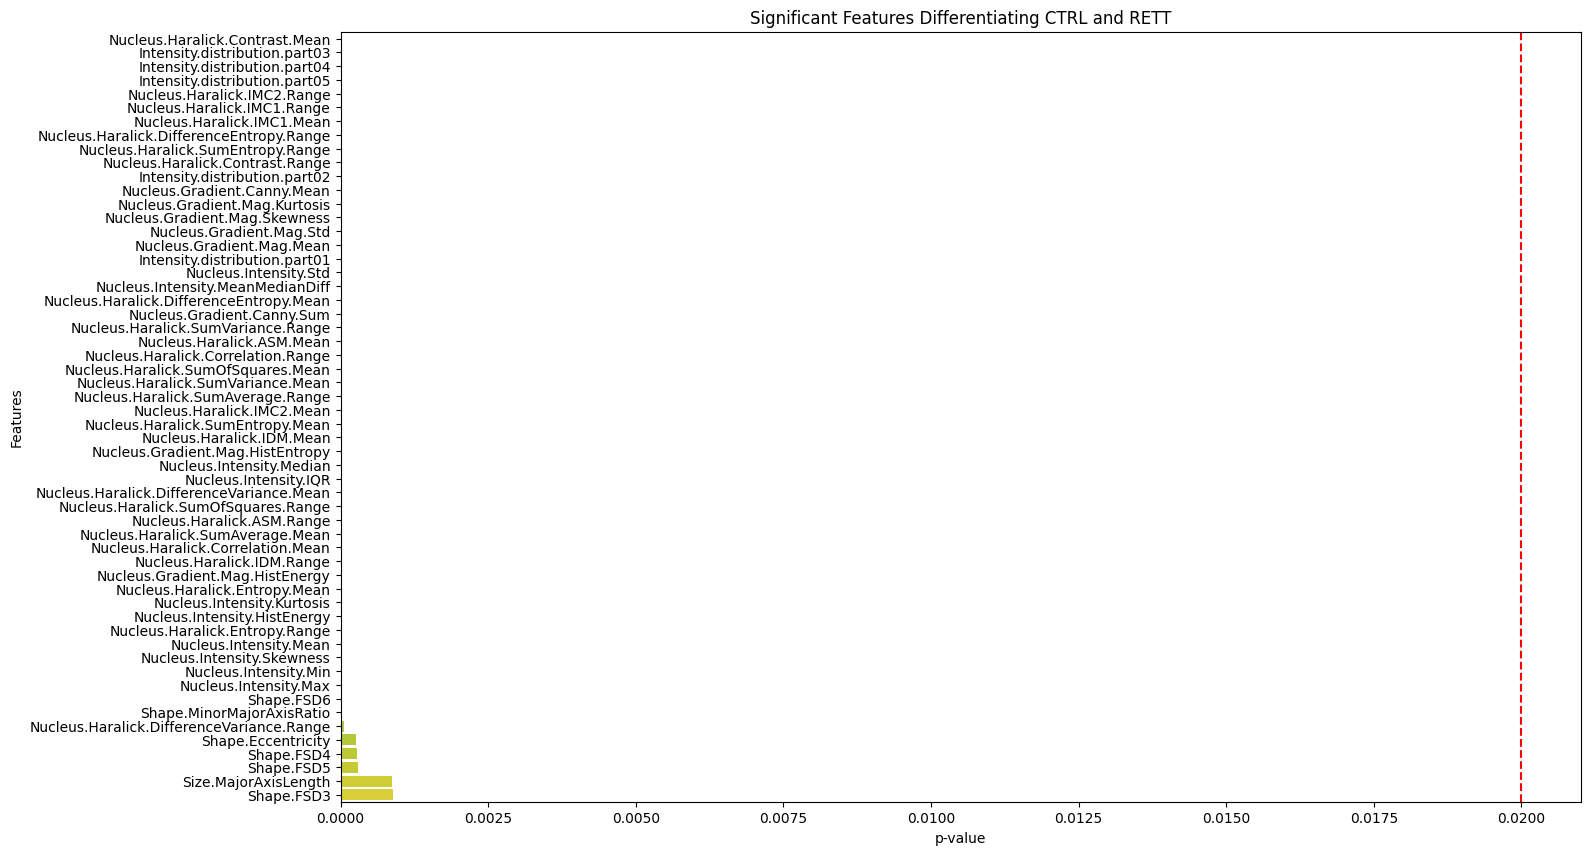

####################################################
####################################################
🛎️ PCA


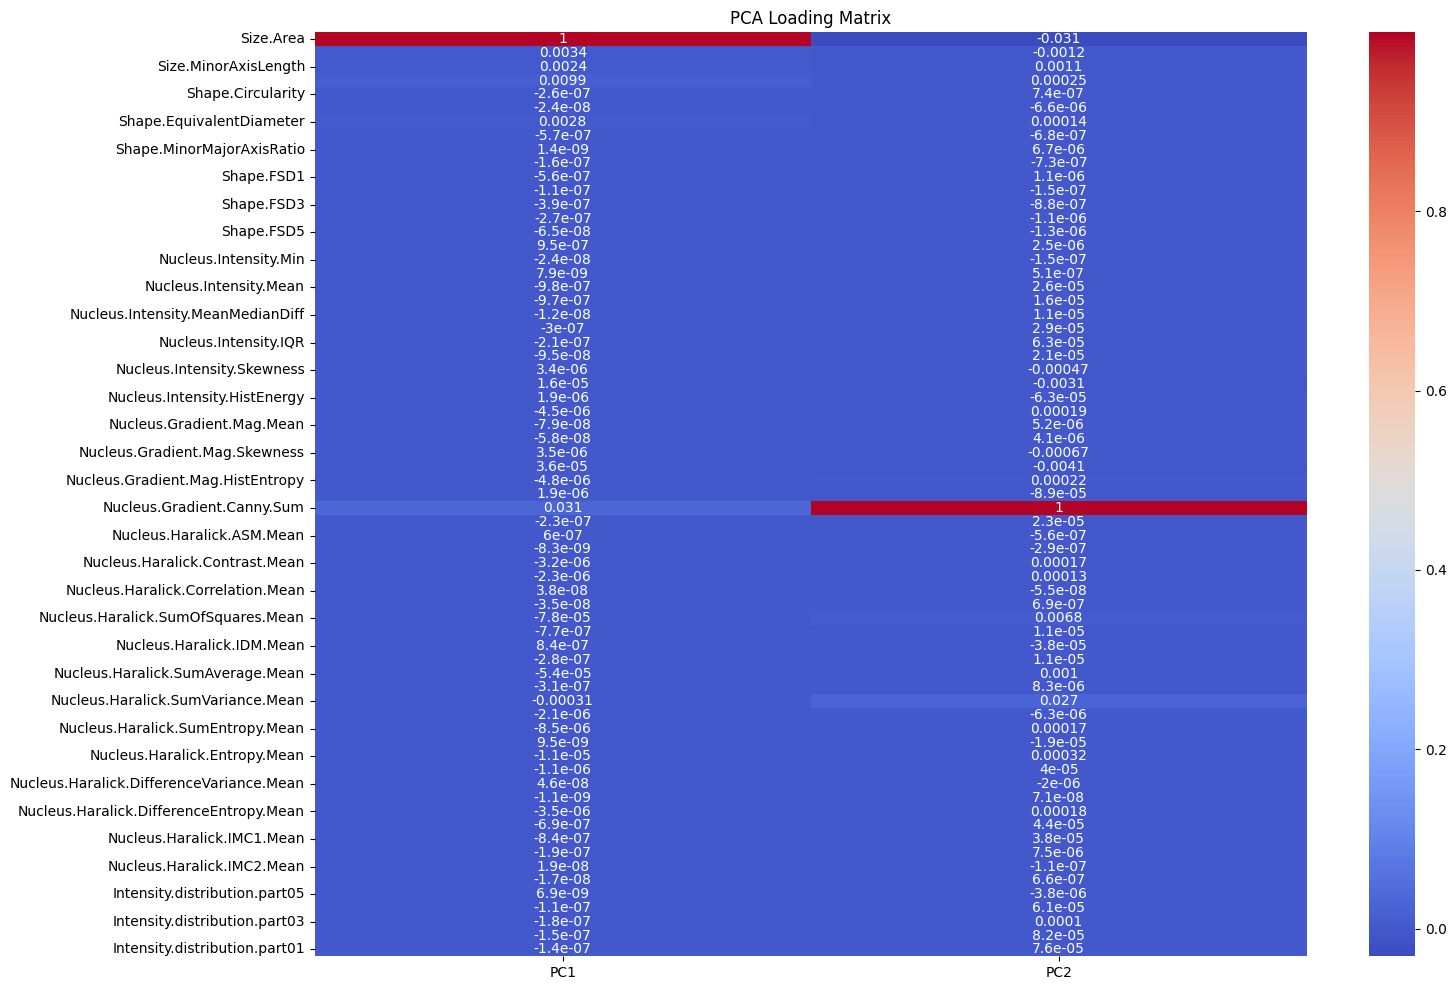

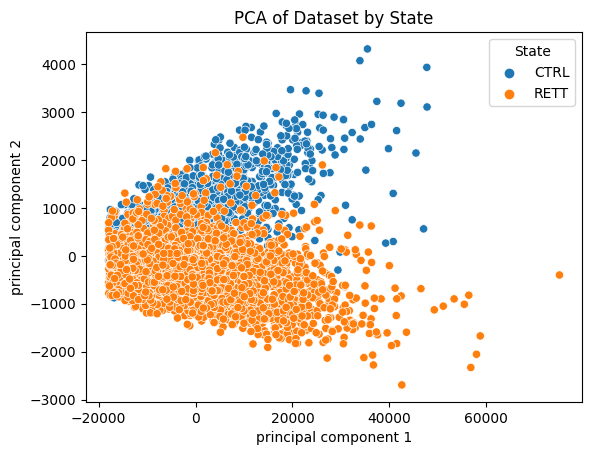

####################################################
####################################################
🛎️ t-SNE


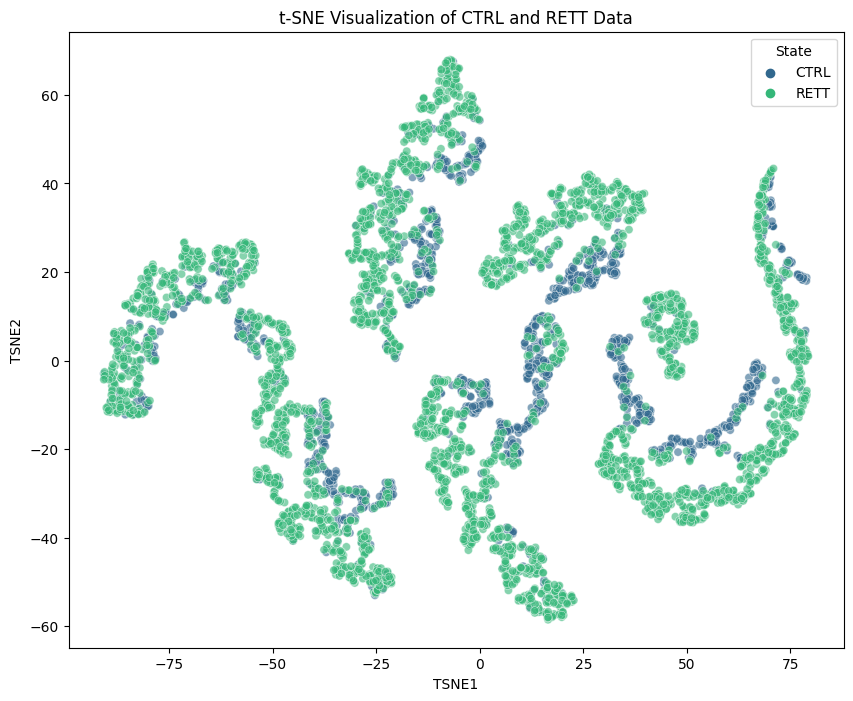

🌸 Feature_GradCAM/features_RETT_CTCF_Resnet10_noavg_GradCAM.csv
🌼 Feature_GradCAM/features_CTRL_CTCF_Resnet10_noavg_GradCAM.csv
####################################################
####################################################
🛎️ ttest
                                      Feature        p_value
37                 Nucleus.Haralick.ASM.Range   0.000000e+00
46           Nucleus.Haralick.SumAverage.Mean   0.000000e+00
47          Nucleus.Haralick.SumAverage.Range   0.000000e+00
36                  Nucleus.Haralick.ASM.Mean   0.000000e+00
33            Nucleus.Gradient.Mag.HistEnergy   0.000000e+00
32           Nucleus.Gradient.Mag.HistEntropy   0.000000e+00
50           Nucleus.Haralick.SumEntropy.Mean   0.000000e+00
51          Nucleus.Haralick.SumEntropy.Range   0.000000e+00
29                   Nucleus.Gradient.Mag.Std   0.000000e+00
27              Nucleus.Intensity.HistEntropy   0.000000e+00
45                 Nucleus.Haralick.IDM.Range   0.000000e+00
24                 Nucleu

/var/folders/gw/yht_b0cx69z8nmt9zhpdj8t00000gp/T/ipykernel_41817/2118762723.py:17: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_val = ttest_ind(


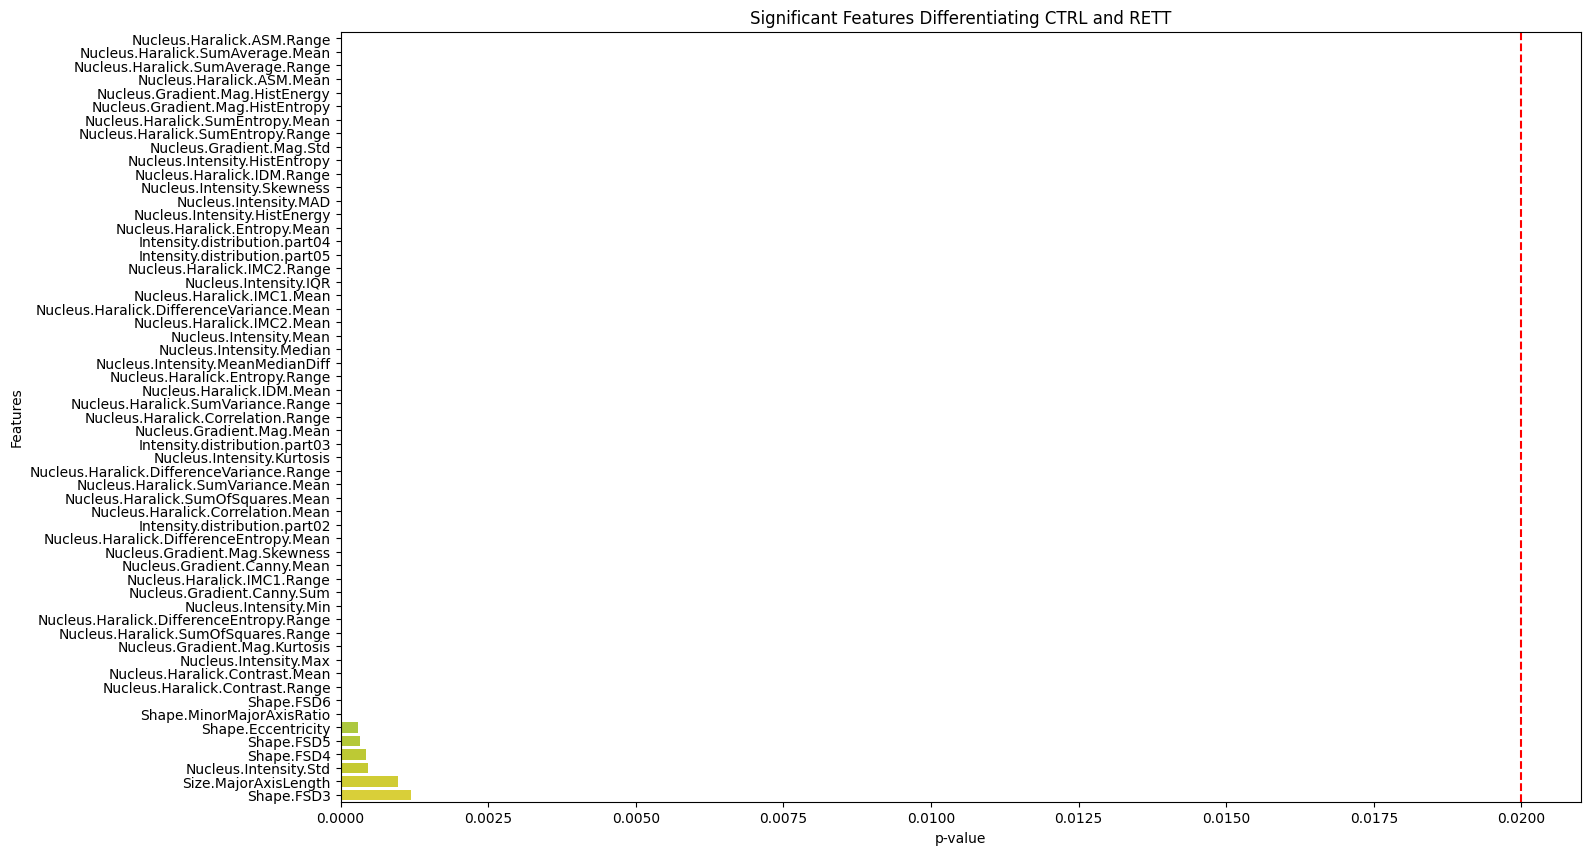

####################################################
####################################################
🛎️ PCA


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [7]:
# Feature_GradCAM and Feature_ScoreCAM
for loadpath in ["Feature_GradCAM", "Feature_ScoreCAM"]:
    for stain_type in ["All", "H3K27ac", "CTCF", "Dapi"]:
        
        savename = f"Feature_{stain_type}"
        
        df_combined, df_RETT, df_CTRL = loadcsv(loadpath, stain_type)
        print("####################################################")
        print("####################################################")
        print("🛎️ ttest")
        from scipy.stats import ttest_ind
        # 初始化存储 p 值的列表
        p_values = []

        # 进行 t-检验
        for column in df_CTRL.columns[:-1]:  # 忽略 'State' 列
            t_stat, p_val = ttest_ind(
                df_CTRL[column], 
                df_RETT[column],
                equal_var=False  # 可以假设不等方差
            )
            p_values.append((column, p_val))

        # 将 p 值转化为 DataFrame
        p_values_df = pd.DataFrame(p_values, columns=['Feature', 'p_value'])

        # 筛选显著特征（例如 p < 0.05）
        significant_features = p_values_df[p_values_df['p_value'] < 0.02]

        # 按 p 值排序
        significant_features = significant_features.sort_values(by='p_value')

        # 打印显著特征
        print(significant_features)

        # 可视化显著特征的 p 值
        plt.figure(figsize=(16, 10))
        sns.barplot(x='p_value', y='Feature', data=significant_features, palette='viridis')
        plt.title('Significant Features Differentiating CTRL and RETT')
        plt.xlabel('p-value')
        plt.ylabel('Features')
        plt.axvline(x=0.02, color='r', linestyle='--')
        plt.savefig(f'{loadpath}/{savename}_ttest.png', dpi=300)
        plt.show()
        print("####################################################")
        print("####################################################")
        print("🛎️ PCA")
        
        from sklearn.decomposition import PCA
        # 提取特征数据
        features = df_combined.drop('State', axis=1)

        # 应用 PCA
        pca = PCA(n_components=2)
        principalComponents = pca.fit_transform(features)
        principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

        # 获取加载矩阵
        loading_matrix = pca.components_.T
        loading_df = pd.DataFrame(loading_matrix, columns=['PC1', 'PC2'], index=features.columns)

#         # 查看加载矩阵
#         print(loading_df)

        # 可视化加载矩阵
        plt.figure(figsize=(16, 12))
        sns.heatmap(loading_df, annot=True, cmap='coolwarm')
        plt.title('PCA Loading Matrix')
        plt.savefig(f'{loadpath}/{savename}_PCA_Matrix.png', dpi=300)
        plt.show()

        # 重置索引以确保对齐
        state_df = df_combined[['State']].reset_index(drop=True)
        finalDf = pd.concat([principalDf, state_df], axis=1)

        # 使用 Seaborn 绘制 PCA 结果图
        sns.scatterplot(data=finalDf, x='principal component 1', y='principal component 2', hue='State')
        plt.title('PCA of Dataset by State')
        plt.savefig(f'{loadpath}/{savename}_PCA.png', dpi=300)
        plt.show()
        print("####################################################")
        print("####################################################")
        print("🛎️ t-SNE")
        from sklearn.manifold import TSNE
        # 应用 t-SNE
        tsne = TSNE(n_components=2, random_state=42)
        tsne_results = tsne.fit_transform(df_combined.drop('State', axis=1))

        # 重置索引，确保索引的一致性
        tsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2']).reset_index(drop=True)
        state_df = df_combined['State'].reset_index(drop=True)

        # 合并 t-SNE 结果和状态标签
        final_df = pd.concat([tsne_df, state_df], axis=1)

        # 绘制结果
        plt.figure(figsize=(10, 8))
        sns.scatterplot(x='TSNE1', y='TSNE2', hue='State', data=final_df, palette='viridis', alpha=0.6)
        plt.title('t-SNE Visualization of CTRL and RETT Data')

        plt.savefig(f'{loadpath}/{savename}_tSNE.png', dpi=300)
        plt.show()

🌸 Feature_image/features_RETT_H3K27ac.csv
🌼 Feature_image/features_CTRL_H3K27ac.csv
####################################################
####################################################
🛎️ ttest
                                      Feature        p_value
20           Nucleus.Intensity.MeanMedianDiff  5.048642e-127
24                 Nucleus.Intensity.Skewness  6.170130e-126
35                Nucleus.Gradient.Canny.Mean   6.817652e-93
34                 Nucleus.Gradient.Canny.Sum   9.730107e-92
28                  Nucleus.Gradient.Mag.Mean   3.176850e-89
44                  Nucleus.Haralick.IDM.Mean   5.063888e-87
17                      Nucleus.Intensity.Max   1.125970e-86
26               Nucleus.Intensity.HistEnergy   1.105317e-78
27              Nucleus.Intensity.HistEntropy   2.162931e-77
54   Nucleus.Haralick.DifferenceVariance.Mean   1.046332e-76
56    Nucleus.Haralick.DifferenceEntropy.Mean   1.004641e-75
45                 Nucleus.Haralick.IDM.Range   1.039203e-71
38      

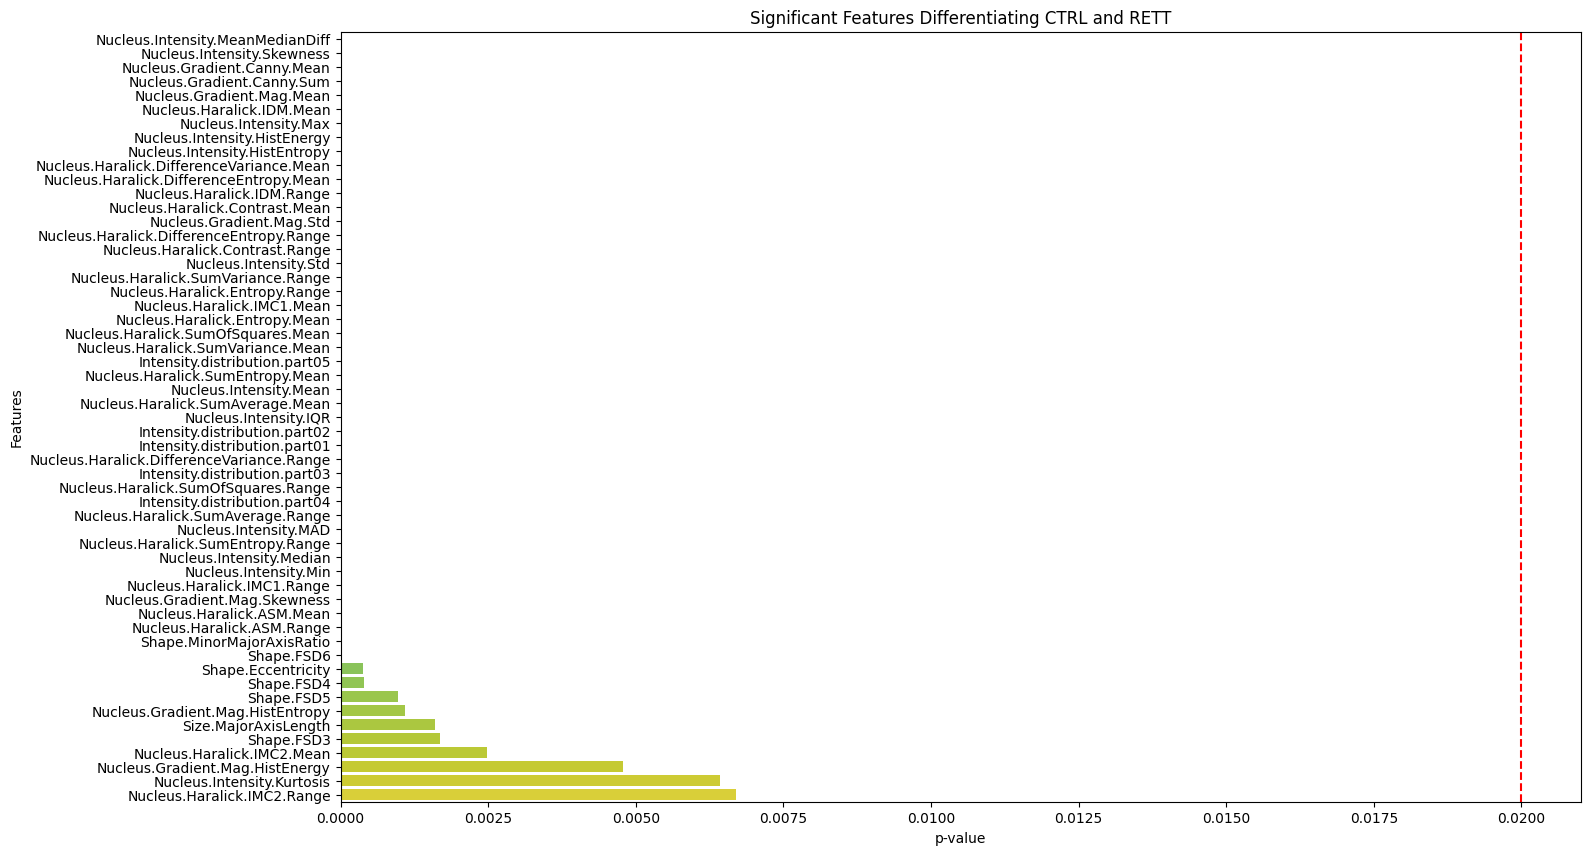

####################################################
####################################################
🛎️ PCA


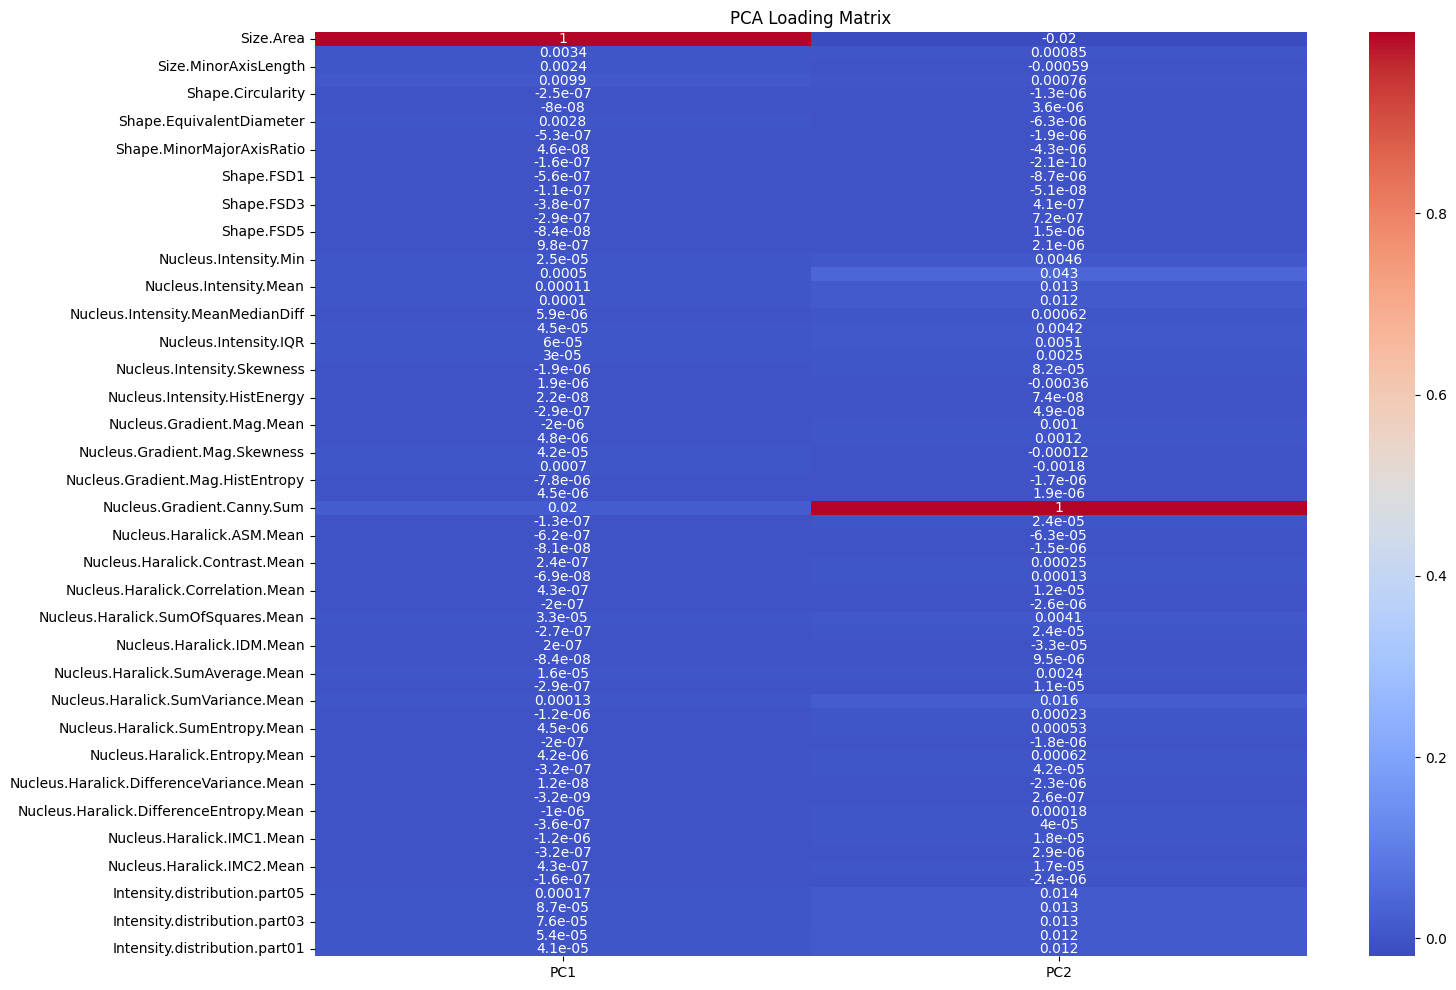

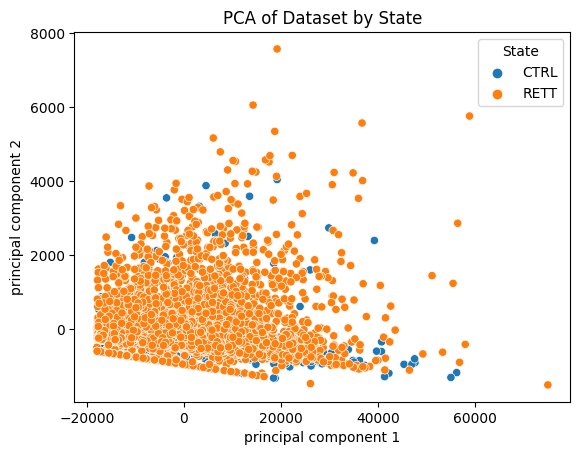

####################################################
####################################################
🛎️ t-SNE


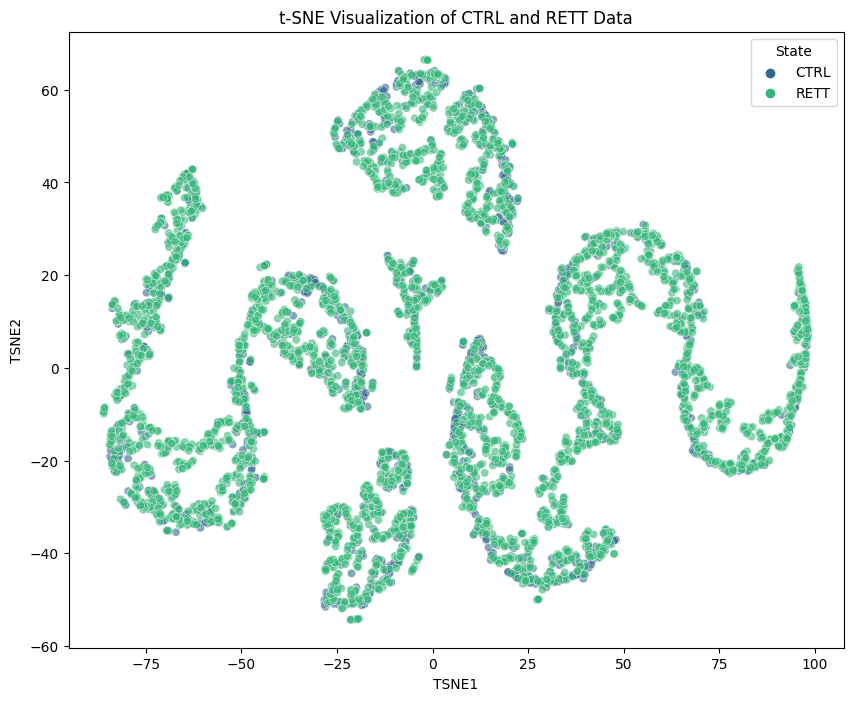

🌸 Feature_image/features_RETT_CTCF.csv
🌼 Feature_image/features_CTRL_CTCF.csv
####################################################
####################################################
🛎️ ttest
                                      Feature        p_value
26               Nucleus.Intensity.HistEnergy  8.108916e-164
24                 Nucleus.Intensity.Skewness  1.189905e-160
27              Nucleus.Intensity.HistEntropy  5.163929e-148
61                Nucleus.Haralick.IMC2.Range   7.683323e-71
40          Nucleus.Haralick.Correlation.Mean   5.058039e-40
62              Intensity.distribution.part05   5.509774e-40
41         Nucleus.Haralick.Correlation.Range   9.665881e-39
60                 Nucleus.Haralick.IMC2.Mean   5.713048e-38
23                      Nucleus.Intensity.MAD   1.347449e-37
22                      Nucleus.Intensity.IQR   2.832191e-34
63              Intensity.distribution.part04   1.619509e-27
55  Nucleus.Haralick.DifferenceVariance.Range   2.054820e-27
19            

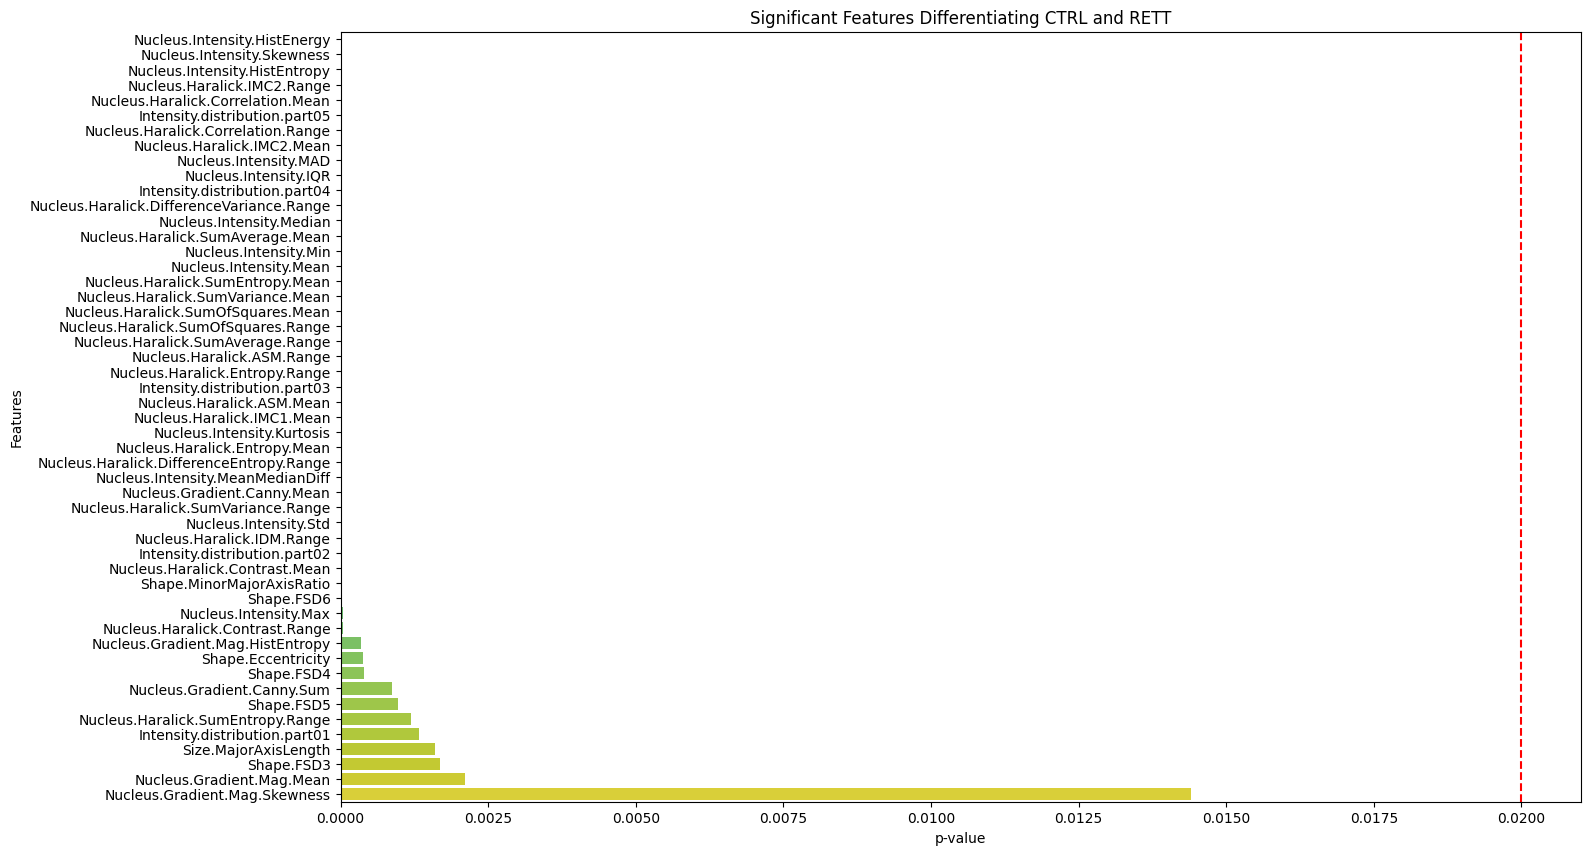

####################################################
####################################################
🛎️ PCA


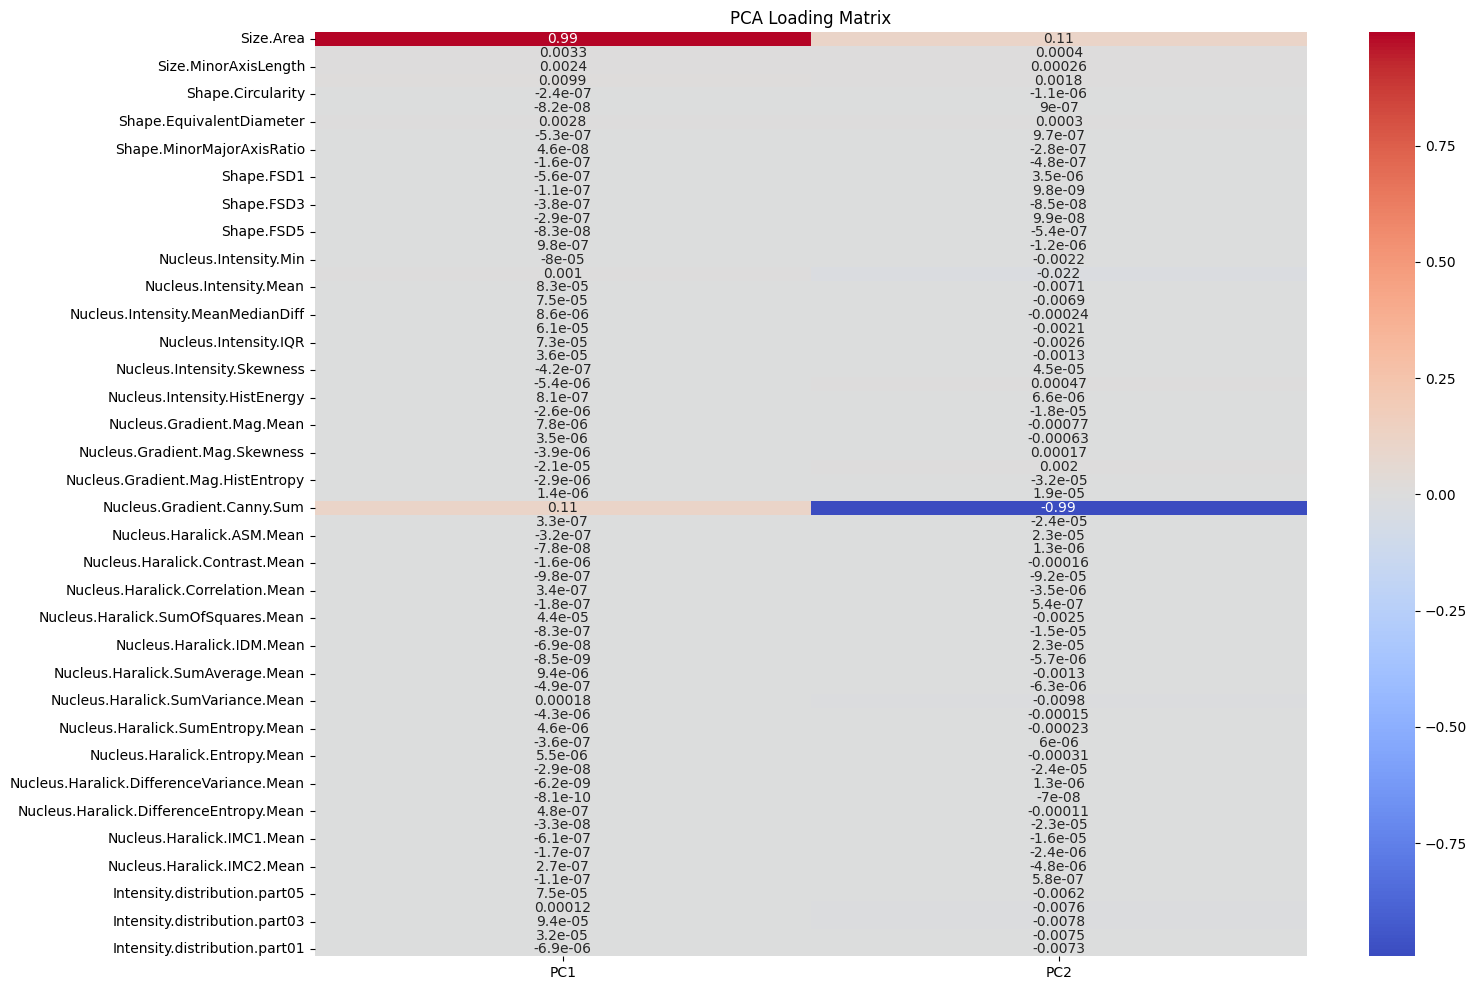

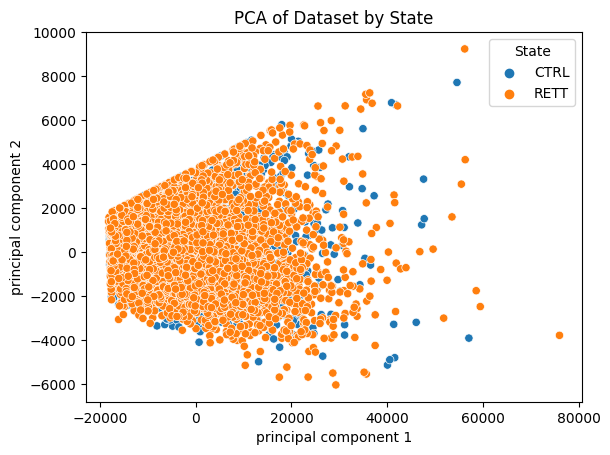

####################################################
####################################################
🛎️ t-SNE


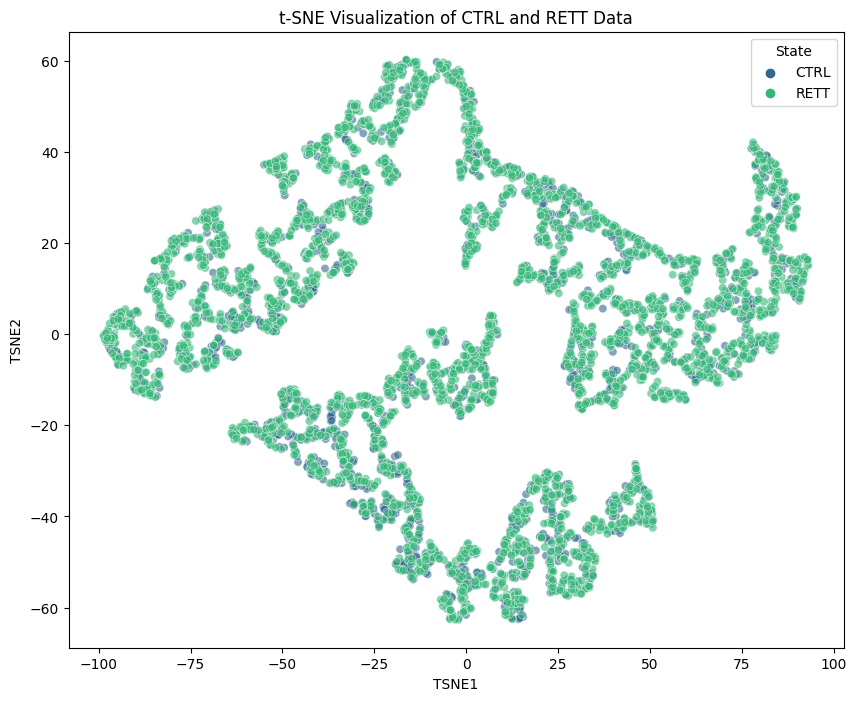

🌸 Feature_image/features_RETT_Dapi.csv
🌼 Feature_image/features_CTRL_Dapi.csv
####################################################
####################################################
🛎️ ttest
                                      Feature        p_value
64              Intensity.distribution.part03  8.520717e-196
65              Intensity.distribution.part02  1.381534e-194
66              Intensity.distribution.part01  2.161446e-194
63              Intensity.distribution.part04  7.036998e-190
18                     Nucleus.Intensity.Mean  4.802859e-188
46           Nucleus.Haralick.SumAverage.Mean  8.658449e-188
19                   Nucleus.Intensity.Median  1.959602e-187
62              Intensity.distribution.part05  6.936344e-177
29                   Nucleus.Gradient.Mag.Std  3.538511e-169
28                  Nucleus.Gradient.Mag.Mean  4.900467e-167
16                      Nucleus.Intensity.Min  9.387352e-164
21                      Nucleus.Intensity.Std  3.501218e-160
47          Nu

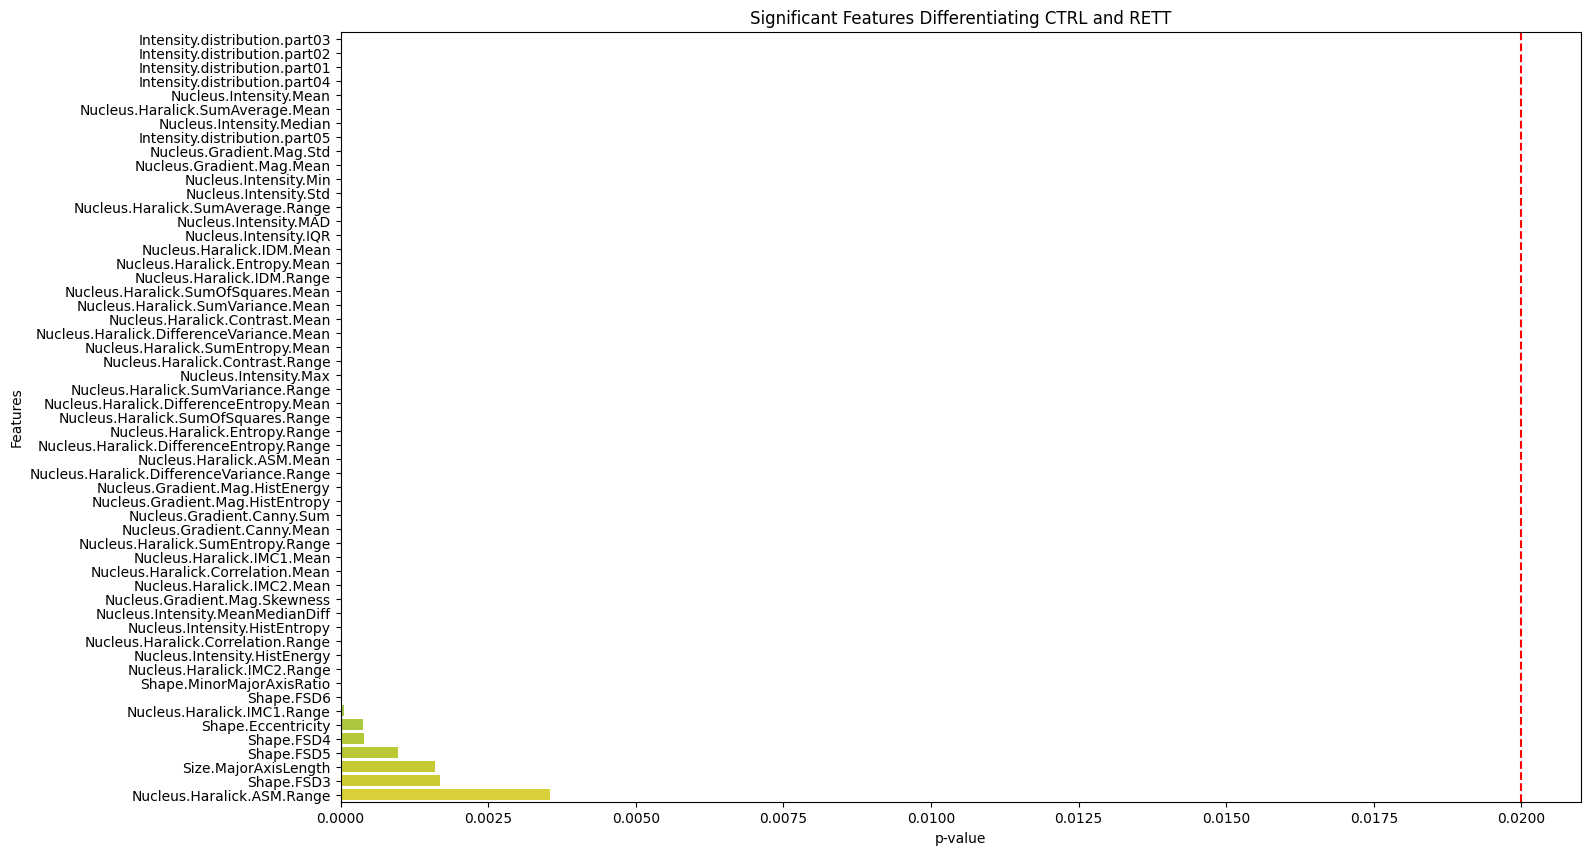

####################################################
####################################################
🛎️ PCA


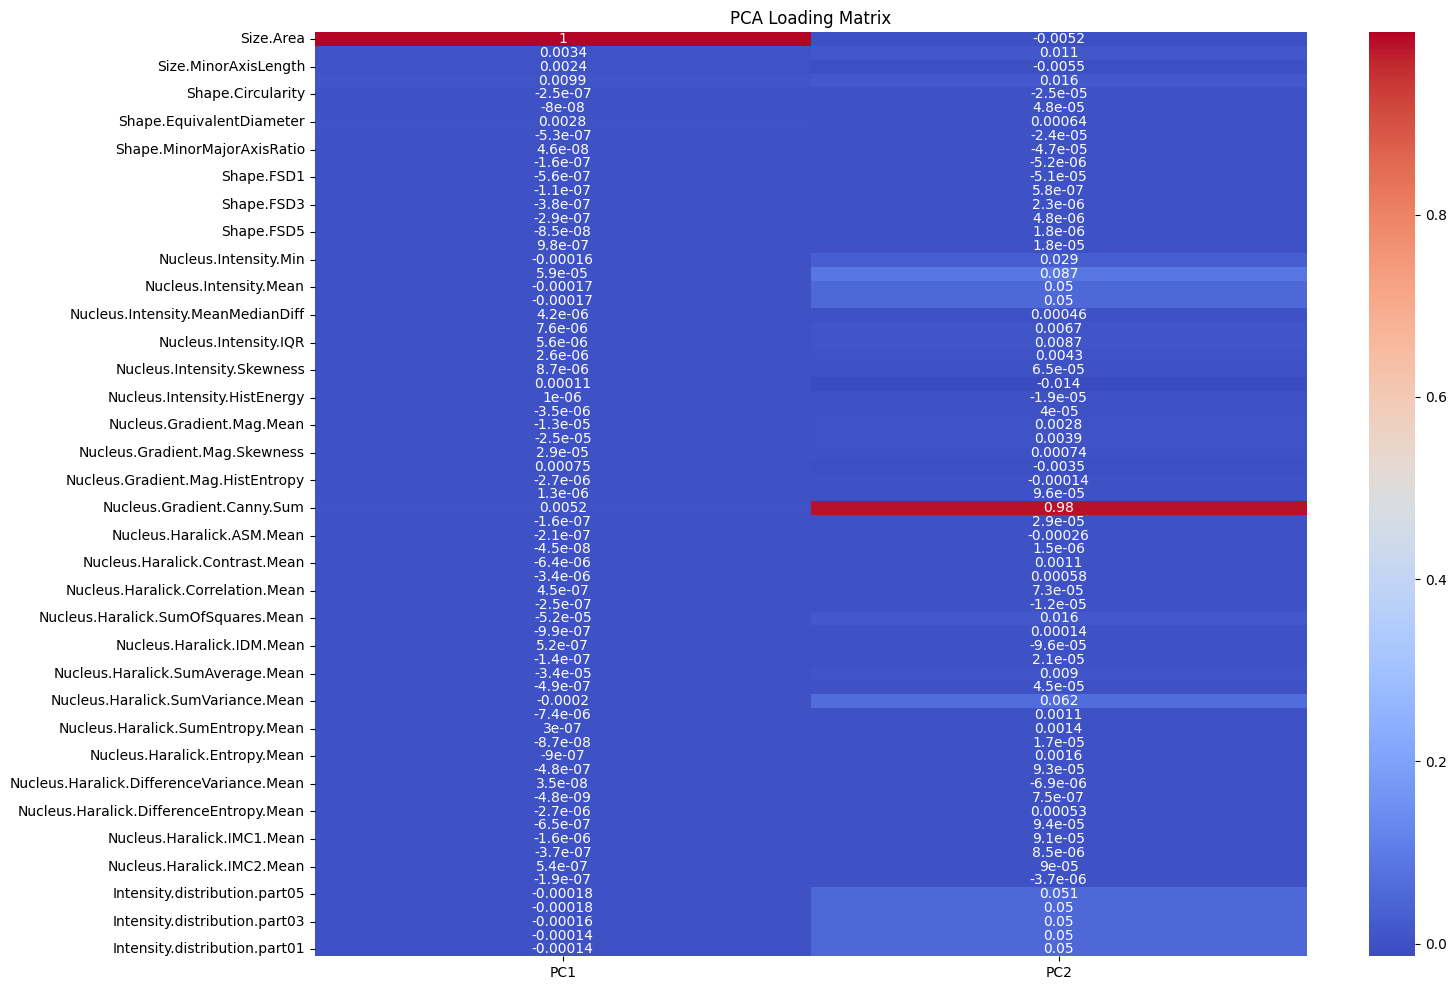

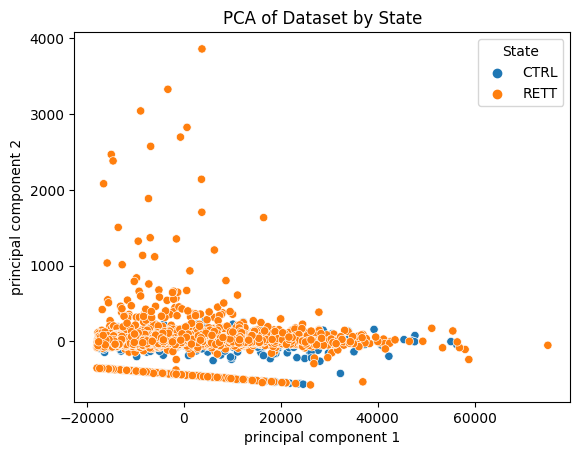

####################################################
####################################################
🛎️ t-SNE


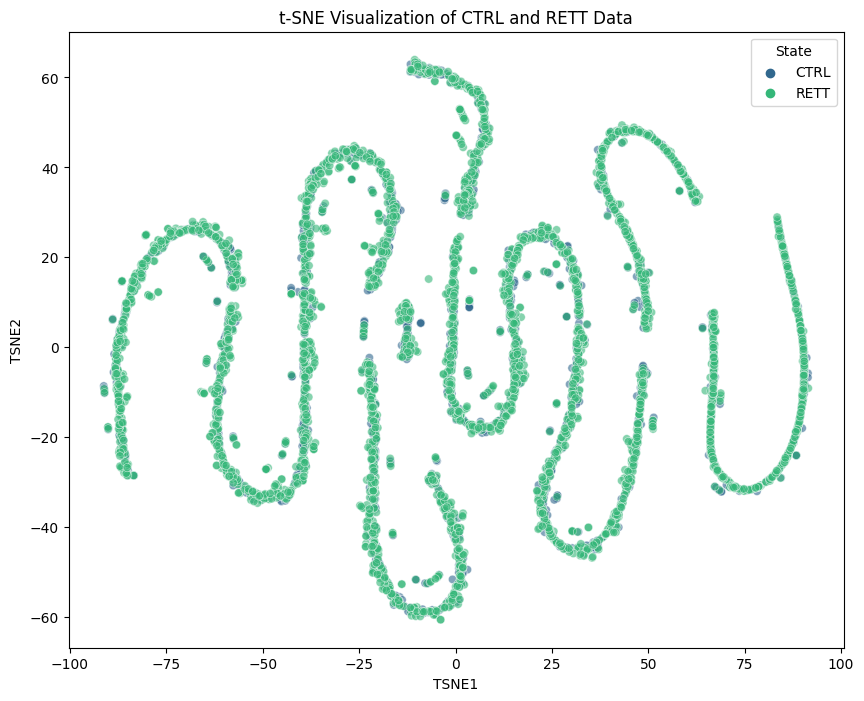

In [8]:
# Feature image
for loadpath in ["Feature_image"]:
    for stain_type in ["H3K27ac", "CTCF", "Dapi"]:
        savename = f"Feature_{stain_type}"
        
        df_combined, df_RETT, df_CTRL = loadcsv(loadpath, stain_type)
        print("####################################################")
        print("####################################################")
        print("🛎️ ttest")
        from scipy.stats import ttest_ind
        # 初始化存储 p 值的列表
        p_values = []

        # 进行 t-检验
        for column in df_CTRL.columns[:-1]:  # 忽略 'State' 列
            t_stat, p_val = ttest_ind(
                df_CTRL[column], 
                df_RETT[column],
                equal_var=False  # 可以假设不等方差
            )
            p_values.append((column, p_val))

        # 将 p 值转化为 DataFrame
        p_values_df = pd.DataFrame(p_values, columns=['Feature', 'p_value'])

        # 筛选显著特征（例如 p < 0.05）
        significant_features = p_values_df[p_values_df['p_value'] < 0.02]

        # 按 p 值排序
        significant_features = significant_features.sort_values(by='p_value')

        # 打印显著特征
        print(significant_features)

        # 可视化显著特征的 p 值
        plt.figure(figsize=(16, 10))
        sns.barplot(x='p_value', y='Feature', data=significant_features, palette='viridis')
        plt.title('Significant Features Differentiating CTRL and RETT')
        plt.xlabel('p-value')
        plt.ylabel('Features')
        plt.axvline(x=0.02, color='r', linestyle='--')
        plt.savefig(f'{loadpath}/{savename}_ttest.png', dpi=300)
        plt.show()
        print("####################################################")
        print("####################################################")
        print("🛎️ PCA")
        
        from sklearn.decomposition import PCA
        # 提取特征数据
        features = df_combined.drop('State', axis=1)

        # 应用 PCA
        pca = PCA(n_components=2)
        principalComponents = pca.fit_transform(features)
        principalDf = pd.DataFrame(data=principalComponents, columns=['principal component 1', 'principal component 2'])

        # 获取加载矩阵
        loading_matrix = pca.components_.T
        loading_df = pd.DataFrame(loading_matrix, columns=['PC1', 'PC2'], index=features.columns)

#         # 查看加载矩阵
#         print(loading_df)

        # 可视化加载矩阵
        plt.figure(figsize=(16, 12))
        sns.heatmap(loading_df, annot=True, cmap='coolwarm')
        plt.title('PCA Loading Matrix')
        plt.savefig(f'{loadpath}/{savename}_PCA_Matrix.png', dpi=300)
        plt.show()

        # 重置索引以确保对齐
        state_df = df_combined[['State']].reset_index(drop=True)
        finalDf = pd.concat([principalDf, state_df], axis=1)

        # 使用 Seaborn 绘制 PCA 结果图
        sns.scatterplot(data=finalDf, x='principal component 1', y='principal component 2', hue='State')
        plt.title('PCA of Dataset by State')
        plt.savefig(f'{loadpath}/{savename}_PCA.png', dpi=300)
        plt.show()
        print("####################################################")
        print("####################################################")
        print("🛎️ t-SNE")
        from sklearn.manifold import TSNE
        # 应用 t-SNE
        tsne = TSNE(n_components=2, random_state=42)
        tsne_results = tsne.fit_transform(df_combined.drop('State', axis=1))

        # 重置索引，确保索引的一致性
        tsne_df = pd.DataFrame(data=tsne_results, columns=['TSNE1', 'TSNE2']).reset_index(drop=True)
        state_df = df_combined['State'].reset_index(drop=True)

        # 合并 t-SNE 结果和状态标签
        final_df = pd.concat([tsne_df, state_df], axis=1)

        # 绘制结果
        plt.figure(figsize=(10, 8))
        sns.scatterplot(x='TSNE1', y='TSNE2', hue='State', data=final_df, palette='viridis', alpha=0.6)
        plt.title('t-SNE Visualization of CTRL and RETT Data')

        plt.savefig(f'{loadpath}/{savename}_tSNE.png', dpi=300)
        plt.show()